### Honey I Shrunk the Kids Film.
#### Each thumbnail is one frame of the Movie. Each thumbnail has been analyzed and embedded via CLIP. You can use the model if you like here: https://replicate.com/andreasjansson/clip-features/examples .

#### This is not an exhaustive demonstration, but it should get teams started. 

### Load Embeddings File

In [1]:
import json
moive_embeddings = json.load(open("honey_i_shrunk_the_kids_movie_embeddings_1_second.json"))

### Show an Image Example

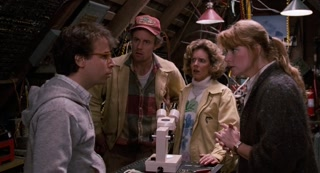

In [10]:
from IPython.display import Image, display
image_root = 'thumbnails_folder2large/'
# Replace 'image_path.jpg' with the path to your image file
image_path = image_root+moive_embeddings[4000]["input"]

# Display the image
Image(filename=image_path)


In [3]:
moive_embeddings[150].keys()

dict_keys(['input', 'embedding'])

In [4]:
import numpy as np

def euclidean_distance(array1, array2):
    # Convert the arrays to NumPy arrays
    array1_np = np.array(array1)
    array2_np = np.array(array2)
    
    # Calculate the Euclidean distance
    distance = np.linalg.norm(array1_np - array2_np)
    return distance

# Example numerical arrays
array1 = moive_embeddings[150]["embedding"]
array2 = moive_embeddings[161]["embedding"]

# Calculate Euclidean distance
distance = euclidean_distance(array1, array2)

# Display the result
print("Euclidean distance between array1 and array2:", distance)


Euclidean distance between array1 and array2: 17.51328733940721


### Distance Over Film to Target Image

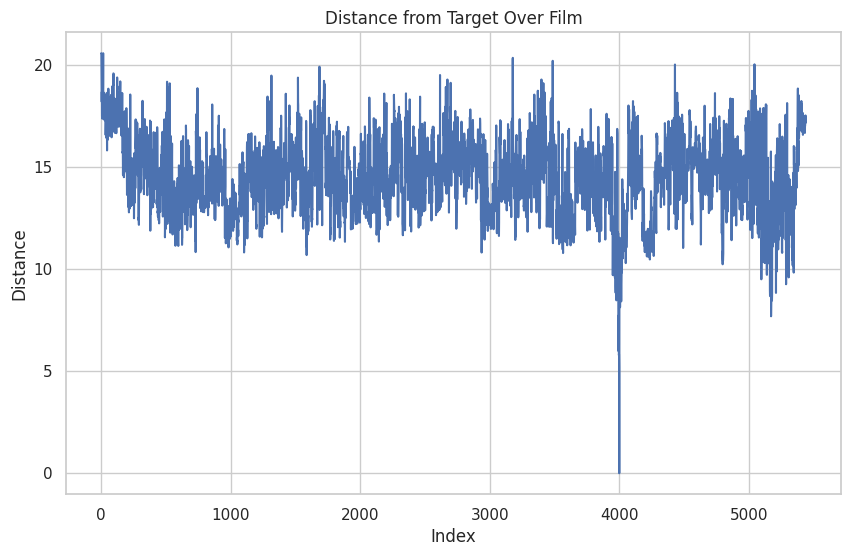

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import heapq

target_index = 4000
target = moive_embeddings[target_index]

index_to_distance = []

# Iterate through the input list
for emb in moive_embeddings:
    current_dist = euclidean_distance(emb["embedding"], target["embedding"])
    index_to_distance.append(current_dist)

# Create a plot using Seaborn
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(10, 6))  # Set the figure size
sns.lineplot(x=range(len(index_to_distance)), y=index_to_distance)  # Plot the array with index as x-axis
plt.xlabel("Index")  # Set the x-axis label
plt.ylabel("Distance")  # Set the y-axis label
plt.title("Distance from Target Over Film")  # Set the title
plt.show()  # Show the plot

### Print out top 50 closest images.

Target Image


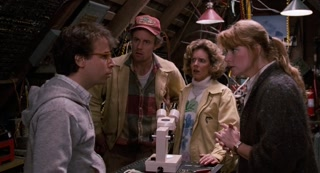

0 4000 thumbnail_4001.jpg


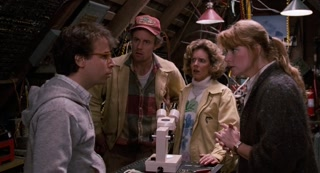

1 3999 thumbnail_4000.jpg


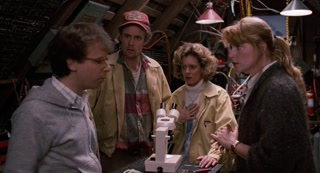

2 3997 thumbnail_3998.jpg


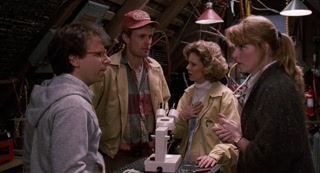

3 3998 thumbnail_3999.jpg


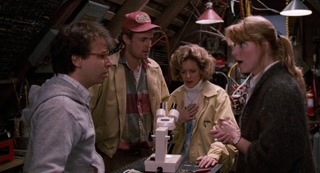

4 3993 thumbnail_3994.jpg


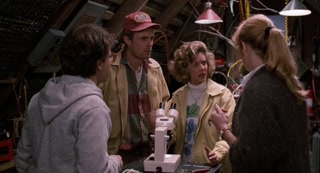

5 3996 thumbnail_3997.jpg


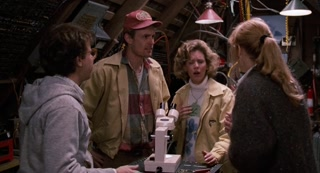

6 3995 thumbnail_3996.jpg


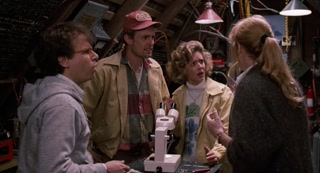

7 5172 thumbnail_5173.jpg


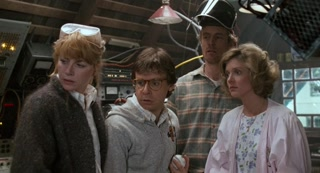

8 3994 thumbnail_3995.jpg


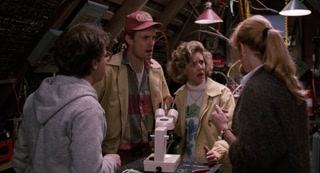

9 4006 thumbnail_4007.jpg


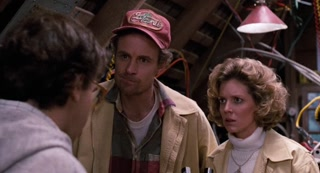

10 4005 thumbnail_4006.jpg


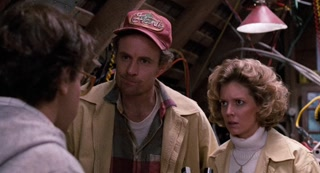

11 4015 thumbnail_4016.jpg


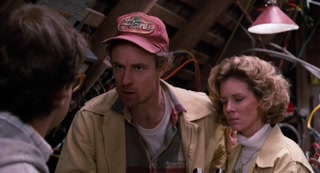

12 5179 thumbnail_5180.jpg


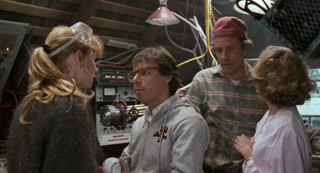

13 3978 thumbnail_3979.jpg


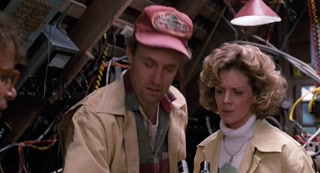

14 4010 thumbnail_4011.jpg


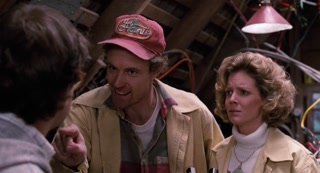

15 4008 thumbnail_4009.jpg


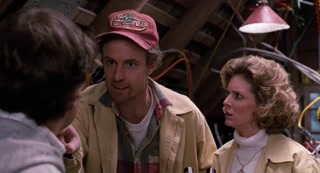

16 5173 thumbnail_5174.jpg


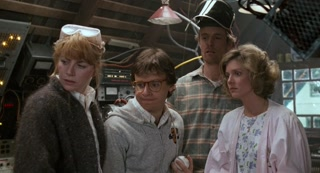

17 4012 thumbnail_4013.jpg


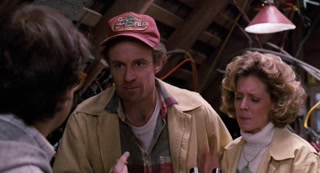

18 5164 thumbnail_5165.jpg


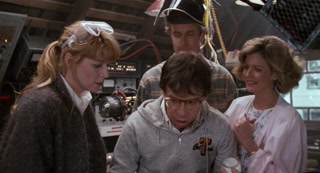

19 5165 thumbnail_5166.jpg


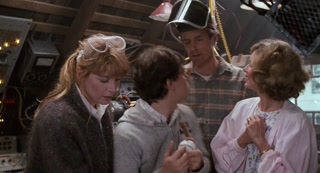

20 5175 thumbnail_5176.jpg


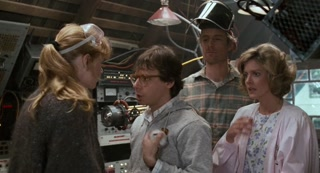

21 4009 thumbnail_4010.jpg


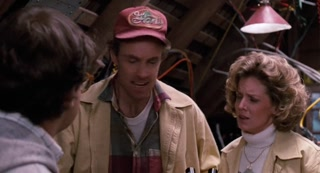

22 5180 thumbnail_5181.jpg


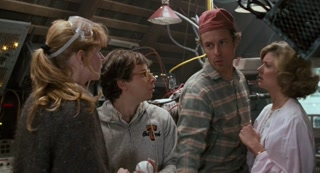

23 3979 thumbnail_3980.jpg


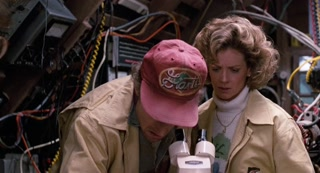

24 5174 thumbnail_5175.jpg


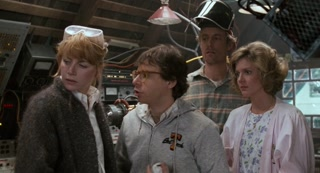

25 5210 thumbnail_5211.jpg


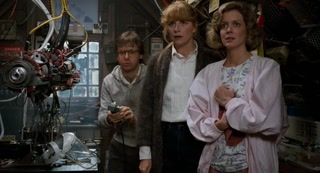

26 3972 thumbnail_3973.jpg


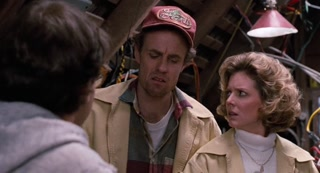

27 3975 thumbnail_3976.jpg


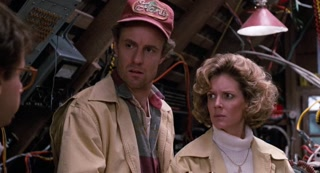

28 4007 thumbnail_4008.jpg


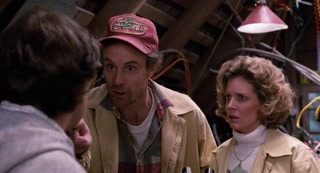

29 5178 thumbnail_5179.jpg


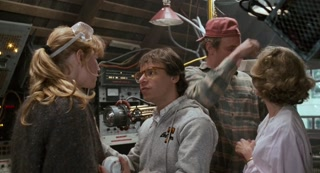

30 5163 thumbnail_5164.jpg


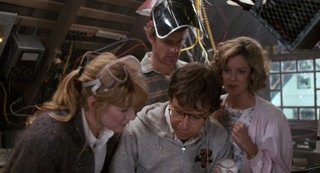

31 4013 thumbnail_4014.jpg


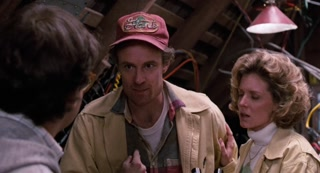

32 3971 thumbnail_3972.jpg


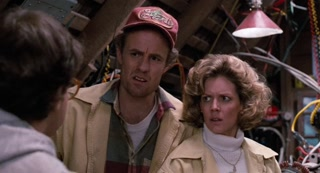

33 4011 thumbnail_4012.jpg


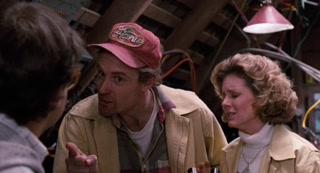

34 5288 thumbnail_5289.jpg


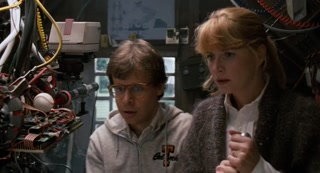

35 3977 thumbnail_3978.jpg


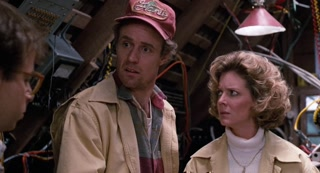

36 5176 thumbnail_5177.jpg


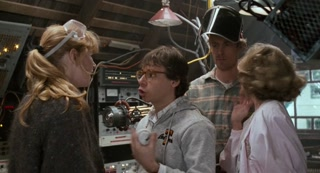

37 5169 thumbnail_5170.jpg


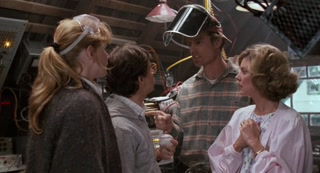

38 5097 thumbnail_5098.jpg


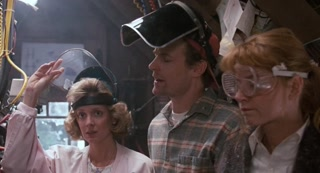

39 3973 thumbnail_3974.jpg


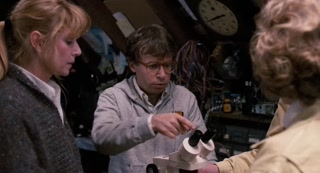

40 5308 thumbnail_5309.jpg


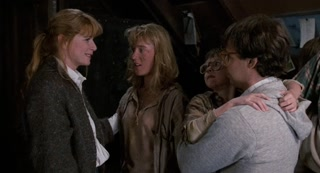

41 3966 thumbnail_3967.jpg


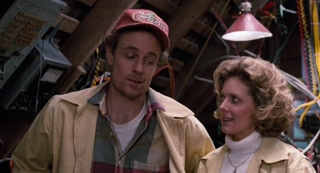

42 3976 thumbnail_3977.jpg


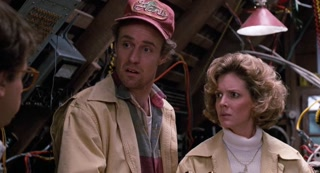

43 5290 thumbnail_5291.jpg


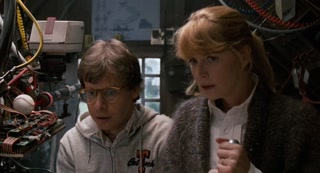

44 5177 thumbnail_5178.jpg


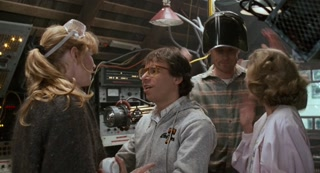

45 3950 thumbnail_3951.jpg


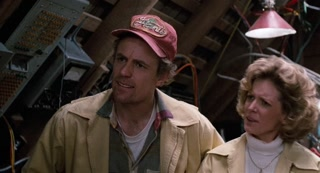

46 5140 thumbnail_5141.jpg


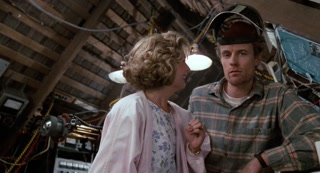

47 5139 thumbnail_5140.jpg


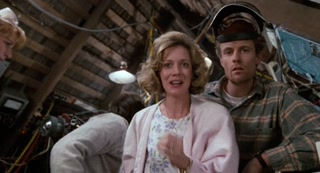

48 3954 thumbnail_3955.jpg


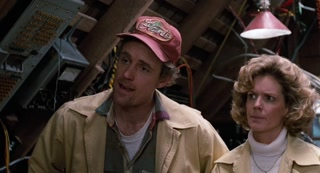

49 5167 thumbnail_5168.jpg


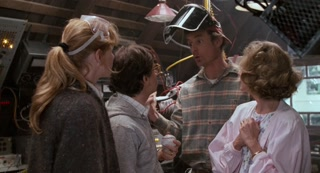

In [14]:
# Sort the index_to_distance array and keep track of the original indexes
sorted_indexes = np.argsort(index_to_distance)

# Display target image
print("Target Image")
image_path = image_root+moive_embeddings[target_index]["input"]
display(Image(filename=image_path))

# Print the sorted indexes
# print("Sorted indexes:", sorted_indexes)
num_to_show = 50
for i in range(0,num_to_show):
    print(i,sorted_indexes[i],moive_embeddings[sorted_indexes[i]]["input"])
    image_path = image_root+moive_embeddings[sorted_indexes[i]]["input"]
    # Display the image
    display(Image(filename=image_path))

### Distance Over Film to Target Frame

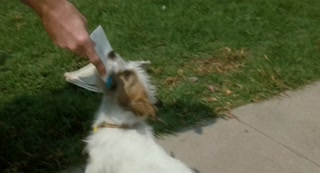

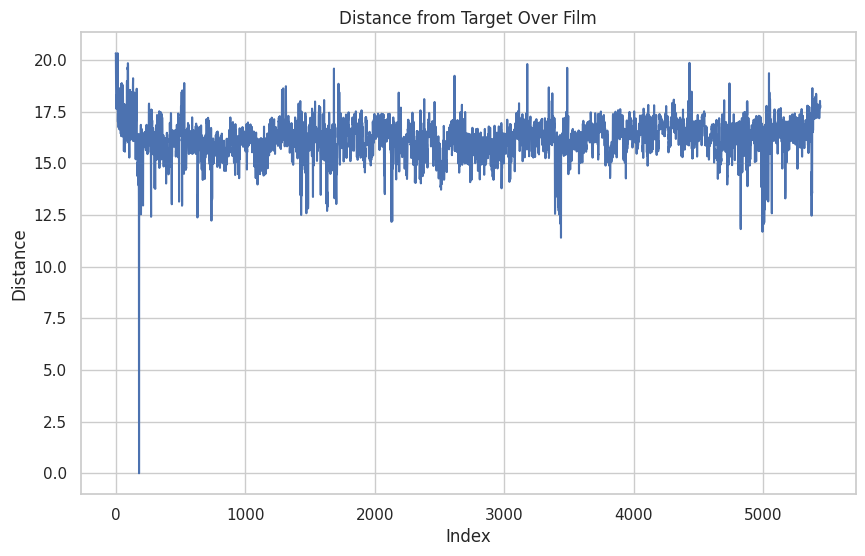

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import heapq


target = moive_embeddings[180]#json.loads("""{"input":"cartoon man","embedding":[-0.31346768140792847,-0.42888015508651733,0.17947527766227722,0.29765912890434265,0.5338654518127441,-0.15170812606811523,-0.17591334879398346,0.5759243369102478,0.2980532944202423,0.5663255453109741,-0.3721786141395569,-0.08126042783260345,-0.041352204978466034,0.45407718420028687,-0.5597681999206543,-0.0809025764465332,0.1549914926290512,-0.07921590656042099,-0.23689915239810944,-0.4388824701309204,0.07812589406967163,0.09908710420131683,0.12750542163848877,0.10330618917942047,0.4309649169445038,-0.20124325156211853,0.1652822047472,-0.11799818277359009,-0.49166494607925415,-0.08633268624544144,-0.11007308959960938,-0.02885524183511734,0.18275557458400726,0.7559927701950073,-0.10903678834438324,-0.2831245958805084,0.6530319452285767,0.055160343647003174,0.11585238575935364,-0.3404618203639984,-0.20721742510795593,0.19610345363616943,0.47205471992492676,-0.20746606588363647,-0.11657099425792694,-0.35236993432044983,-0.19029277563095093,-0.02430659532546997,-0.11064870655536652,0.01130896806716919,-1.0541499853134155,0.11143705993890762,-0.2651098668575287,-0.06867414712905884,0.1255749762058258,-0.22270242869853973,0.0457054041326046,0.020646370947360992,0.031606972217559814,-0.3490608036518097,0.3201771676540375,0.5578124523162842,0.23976942896842957,-0.3777207136154175,-0.3714430630207062,-0.5026816725730896,-0.22352555394172668,0.4812443256378174,0.19193905591964722,-0.45786619186401367,-0.17580574750900269,-0.013936929404735565,-0.5456269979476929,0.3652685582637787,-0.09723103046417236,0.2068759649991989,0.33265557885169983,0.29718926548957825,0.05544622242450714,-0.18317577242851257,0.026946723461151123,0.11211802065372467,0.5135292410850525,0.06962120532989502,-0.13790138065814972,0.20041179656982422,-0.3564346432685852,0.30821743607521057,-0.41805604100227356,0.28724607825279236,0.3201919198036194,-0.08206108957529068,0.5289645791053772,-0.10829727351665497,0.4034956693649292,0.28676700592041016,0.21409325301647186,-0.13210996985435486,0.3716745376586914,-0.21259455382823944,-0.6821563243865967,-0.07521213591098785,0.7052985429763794,0.11609134078025818,-0.17691078782081604,-0.8750573396682739,0.3585827350616455,0.0015508979558944702,0.8503729104995728,-0.41528990864753723,-0.6660870313644409,-0.09371745586395264,0.2964414656162262,0.24039527773857117,-0.39802154898643494,-0.02764737606048584,-0.20051392912864685,0.08055952191352844,-0.21312719583511353,-0.16002270579338074,-0.1321450173854828,0.16739770770072937,-0.11994954943656921,0.5279714465141296,0.5560768842697144,0.47559213638305664,-0.09930580854415894,-0.838257908821106,-0.6985636949539185,-0.7367291450500488,0.02798546850681305,-1.5081510543823242,-0.5754654407501221,-0.7635852098464966,-0.42015010118484497,0.34944915771484375,-0.09751908481121063,0.08409979939460754,-0.678286075592041,-0.35379141569137573,-0.31270965933799744,-0.6416593194007874,-0.2412102073431015,-0.24903427064418793,0.7125018835067749,-0.6184170246124268,0.22918656468391418,0.6750776767730713,0.0070429518818855286,0.40753787755966187,0.2589770555496216,0.1599564552307129,-0.051881492137908936,-0.3847484886646271,0.5477724671363831,-0.3396870493888855,-0.1484193354845047,0.2862248420715332,-0.06746439635753632,-0.48176684975624084,-0.6911875605583191,-0.11907365918159485,0.26072052121162415,0.08156448602676392,-0.15157857537269592,-0.10371123254299164,-0.40603917837142944,-0.24614651501178741,0.26315271854400635,-0.17441417276859283,-0.6612879037857056,0.027244120836257935,0.0868295282125473,0.22928962111473083,0.09739561378955841,-0.4352415204048157,0.15641704201698303,-0.3283737897872925,-0.05648794770240784,0.0060811638832092285,-0.510711669921875,-0.2774122357368469,0.3390105068683624,0.4709993898868561,-0.2761790156364441,-0.19455066323280334,0.29194003343582153,-0.29093196988105774,0.6365697979927063,0.33499985933303833,-0.20037135481834412,-0.22372807562351227,0.050425998866558075,0.2975315451622009,0.39315879344940186,-2.4914298057556152,0.1565873920917511,0.08488041162490845,0.11994373798370361,0.46134811639785767,0.06913310289382935,0.8137253522872925,0.06134440749883652,-0.5060981512069702,-0.301719605922699,0.3755645453929901,-0.11383362114429474,0.12166733294725418,0.08126434683799744,-0.01579686999320984,-0.041216470301151276,-0.14428912103176117,0.21766428649425507,-0.2173243761062622,0.3593668043613434,-0.3405298888683319,0.3347002863883972,0.6673145294189453,0.2802817225456238,0.3791444003582001,0.1834801733493805,0.13465222716331482,0.18926957249641418,-0.01396556943655014,-0.3462595045566559,-0.22314724326133728,-0.6023467779159546,0.027120517566800117,0.12276613712310791,0.11121609061956406,-0.09724438190460205,-0.008417859673500061,-0.2934364676475525,0.17882631719112396,0.049935147166252136,0.030020922422409058,-0.41660240292549133,0.19426587224006653,-0.0899813175201416,0.5186054706573486,0.5012553930282593,-0.08020669221878052,0.10113482922315598,-0.41250383853912354,-0.012160494923591614,0.1364603042602539,0.5005387663841248,0.010460972785949707,0.4310969114303589,0.8247004151344299,-0.5040171146392822,0.019070684909820557,-0.006055653095245361,-0.20764878392219543,0.18671806156635284,-0.11557050049304962,0.19503453373908997,-0.4658224284648895,-0.012183785438537598,0.9523137807846069,-0.13204500079154968,0.1326490193605423,-0.2437470406293869,-0.19427812099456787,-0.16043823957443237,-0.32515764236450195,-0.43411824107170105,-0.09814679622650146,0.27850642800331116,-0.6987694501876831,-0.06412342190742493,-0.37692171335220337,-0.2781343162059784,0.08604656159877777,0.15984748303890228,-0.11890508979558945,0.04315955936908722,-0.3794019818305969,-0.48852306604385376,-0.5236930251121521,-0.3264102339744568,0.5667462348937988,0.20374393463134766,0.17664845287799835,-0.511648952960968,-0.1933509111404419,-0.3066495656967163,0.021135754883289337,-1.6159870624542236,-0.3480001389980316,0.36970728635787964,0.05892960727214813,-0.14841541647911072,0.7973206639289856,-0.017102479934692383,-0.4303692877292633,-0.7433387637138367,0.34767982363700867,0.28517478704452515,0.19433236122131348,-0.3669299781322479,-0.2039918750524521,0.32512587308883667,-0.3304474353790283,-0.10901282727718353,-0.044227927923202515,-0.9263855218887329,-0.15672123432159424,-0.269909143447876,0.46758198738098145,-0.07915946841239929,-0.2849038243293762,0.061584681272506714,0.4037899672985077,0.4120500683784485,-0.1487807035446167,-10.17108154296875,-0.06981107592582703,-0.34527209401130676,-0.25034141540527344,-0.33448031544685364,0.11748412251472473,-0.5905527472496033,-0.2007218599319458,-0.010784618556499481,-0.4384619891643524,-0.45646488666534424,0.3440491557121277,-0.6020389795303345,0.4309483766555786,-0.12664899230003357,-0.06330542266368866,0.31481996178627014,-0.4721783697605133,-0.31123849749565125,-0.06909958273172379,-0.33146607875823975,-0.32662233710289,0.6339125633239746,0.22715575993061066,-0.10064220428466797,0.29982084035873413,-0.1434745490550995,0.2760807275772095,-0.21021169424057007,0.4302937388420105,0.3969240188598633,0.2896844148635864,0.27297669649124146,-0.05887322872877121,0.06494443118572235,0.02821066975593567,-1.0425792932510376,-0.41157063841819763,0.10448597371578217,-1.2753947973251343,-0.04806213080883026,-0.05257172882556915,-0.2630980610847473,0.45143356919288635,-0.3154846131801605,-0.529970645904541,0.8183726072311401,-0.31907904148101807,-0.24549232423305511,0.24504277110099792,0.6866252422332764,0.09229642152786255,-0.2671642601490021,-0.049824655055999756,-0.22293898463249207,-0.5440097451210022,-0.13591665029525757,-0.5452344417572021,-0.20599260926246643,0.15261617302894592,-1.086594581604004,0.23400908708572388,0.39691025018692017,0.15463852882385254,0.09428202360868454,-0.1365964710712433,-0.36636435985565186,0.20858408510684967,-0.0753479152917862,-0.8060351610183716,0.3019084930419922,0.11320749670267105,0.3673710227012634,-0.4731844365596771,0.06425365060567856,-0.3273657560348511,-0.3549777865409851,-0.49284327030181885,-0.21737459301948547,0.27575719356536865,0.07361814379692078,-0.30720269680023193,-0.12381771206855774,-0.11063466966152191,0.04384864121675491,0.017981693148612976,-0.022179901599884033,0.22728468477725983,0.6908068656921387,0.13674268126487732,-0.5241934061050415,-0.5661221742630005,-0.4027121067047119,-0.10880747437477112,-0.5697497129440308,-0.245741605758667,-0.10823802649974823,-1.1438307762145996,-0.4931139349937439,-0.14598003029823303,0.10200731456279755,0.8305763602256775,-0.24032875895500183,-0.0011559054255485535,-0.20070220530033112,0.17905040085315704,0.26532861590385437,-0.40205901861190796,-0.32564476132392883,-0.02427951991558075,-0.21331912279129028,0.42950794100761414,0.1615283042192459,-0.0025652050971984863,0.3013257384300232,-0.48094648122787476,0.14445137977600098,0.3607075810432434,-0.45949751138687134,0.09681835770606995,-0.44963133335113525,-0.11634612083435059,-0.0929608941078186,-0.23859766125679016,9.422764778137207,0.05466747283935547,-0.010736346244812012,0.1966995745897293,-0.04983264207839966,-0.505357563495636,-0.13394895195960999,0.12732946872711182,0.5256038308143616,0.22695034742355347,0.2474328577518463,-0.21095672249794006,0.25669875741004944,-0.07639750838279724,-0.05620604753494263,0.4084988236427307,0.04304447025060654,0.22026894986629486,-0.5387848615646362,-0.4492992162704468,-0.21963781118392944,-0.5168459415435791,0.047260768711566925,0.2943797707557678,0.11877580732107162,-0.11062031984329224,0.12164990603923798,1.4975452423095703,0.07594607025384903,0.491528183221817,0.42332619428634644,0.11704732477664948,0.03307420015335083,0.20277009904384613,0.111341692507267,-0.22610512375831604,0.05016469955444336,0.023211002349853516,-0.7262170314788818,0.356248676776886,0.056762635707855225,0.15045884251594543,-0.19863641262054443,-0.42781341075897217,0.31852781772613525,-0.11510153114795685,-0.040292829275131226,-0.33751600980758667,-0.7227189540863037,0.9293732643127441,-0.1514209806919098,-0.22545847296714783,-0.664310097694397,-0.328302264213562,0.6152597069740295,0.30946066975593567,-0.3067586421966553,-0.15032215416431427,0.05259352922439575,0.24610380828380585,-0.20133107900619507,-0.37617063522338867,-0.24241980910301208,-0.26931360363960266,-0.17225044965744019,-0.14111202955245972,0.1009541004896164,-0.009001374244689941,0.2959820032119751,-0.14732709527015686,0.13873140513896942,-0.056543365120887756,-0.10627073049545288,0.24378710985183716,-0.798054575920105,-0.45968908071517944,0.09581853449344635,-0.1803808957338333,0.21423545479774475,0.6846956014633179,-0.0016047954559326172,0.07437966018915176,-0.20791541039943695,0.2002057135105133,-0.44629234075546265,-0.584011435508728,-0.2365495264530182,-0.3701908588409424,-0.18706786632537842,-0.72972172498703,-0.49245238304138184,-0.5626804828643799,-0.5722219347953796,0.5416040420532227,0.13225650787353516,-0.34295135736465454,0.03688414394855499,-0.32076871395111084,-0.1704210489988327,0.03203829377889633,-0.04273088276386261,0.5385105609893799,-0.20647700130939484,0.2752513885498047,-0.7970730662345886,0.10660478472709656,0.19758516550064087,-0.0908149927854538,-0.1826380491256714,0.19607406854629517,0.462882936000824,0.2688596248626709,0.544219434261322,0.057449981570243835,-0.4637669622898102,-0.19610318541526794,0.048074156045913696,-0.054363906383514404,0.12455601245164871,0.3669503927230835,0.28253307938575745,-0.1802976429462433,0.11999843269586563,0.8776514530181885,1.2770756483078003,0.3655316233634949,-0.2271909862756729,-0.24987396597862244,0.16485632956027985,-0.08584573864936829,0.007991962134838104,0.2145157754421234,0.23313398659229279,-0.3397725522518158,-0.6562263369560242,0.11064717173576355,-0.5693192481994629,0.16457971930503845,0.3536408543586731,0.2531866729259491,0.125829815864563,0.0869922935962677,-0.4628382623195648,-0.3893618583679199,-0.11007469892501831,-0.01534755527973175,-0.1319958120584488,-0.10948383808135986,0.12256084382534027,0.014707792550325394,0.12242259830236435,0.5366778373718262,0.016586408019065857,0.1001325398683548,0.10050448030233383,0.4599479138851166,0.06130318343639374,-0.6351804733276367,0.025357365608215332,0.028939075767993927,-0.2922925651073456,0.030510999262332916,-0.2904541492462158,-0.6197746992111206,-0.5872071981430054,-0.18228882551193237,0.11536414921283722,0.14506347477436066,0.12197728455066681,-0.01628050208091736,-0.2738844156265259,0.6491922736167908,0.23007549345493317,-0.42893657088279724,-0.44286566972732544,-0.4827984571456909,-0.3348613381385803,-0.43680474162101746,-0.20492027699947357,-0.2538997530937195,0.18687286972999573,0.3153558373451233,-0.1381659060716629,-0.3602113127708435,-1.5222516059875488,0.9129524827003479,-0.5669851303100586,-0.48054659366607666,-0.3891047537326813,0.09948137402534485,-0.08027704060077667,0.18470829725265503,0.09892792254686356,0.343744695186615,-0.030358076095581055,-0.29036518931388855,-0.26397544145584106,-0.16596592962741852,-0.29573237895965576,-0.05756467580795288,-0.34032803773880005,-0.47391217947006226,-0.28071728348731995,0.3381704092025757,1.1399378776550293,0.5071502923965454,0.139573335647583,-0.2939552068710327,0.16622298955917358,0.08383636176586151,0.02172328531742096,0.44477006793022156,0.6418721079826355,-0.258710652589798,-0.3946937918663025,0.09113563597202301,-0.3695545792579651,0.5646471977233887,0.23618736863136292,0.2809186577796936,-0.06948255747556686,0.04408887028694153,-0.16633950173854828,-0.09239096939563751,0.20215186476707458,0.9027112126350403,-0.598447322845459,0.1294797956943512,0.3147318363189697,0.7560182213783264,-0.1026996374130249,-0.3248257637023926,0.1246894896030426,0.3760177493095398,0.4711037576198578,-0.001965343952178955,0.2391148805618286,0.07949911057949066,-0.6046339869499207,-0.007081836462020874,-0.034371256828308105,-0.005793631076812744,0.003238856792449951,-0.5186563730239868,-0.3782675266265869,0.3255106210708618,0.011040329933166504,0.17978908121585846,0.06466846913099289,-0.21123874187469482,0.2642189562320709,-0.14459408819675446,0.372029572725296,0.2793196439743042,-0.3920208811759949,-0.15683776140213013,-0.3051813542842865,0.07201321423053741,-0.0018309950828552246,-0.3418675363063812,0.6921812295913696,0.5411243438720703,0.0048775821924209595,-2.3463449478149414,0.5468795299530029,0.18383854627609253,0.7716403007507324,0.1142776757478714,-0.4311485290527344,-0.17493288218975067,-0.1403382420539856,-0.15964220464229584,-0.3225061893463135,-0.05920332670211792,0.611807107925415,-0.28687044978141785,-0.2983431816101074,-0.21903987228870392,-0.2408997118473053,0.3613685369491577,-0.27600371837615967,-0.2479831874370575,-0.023547597229480743,0.3795239329338074,0.23087695240974426,0.5608253479003906,0.030224576592445374,-0.14026059210300446,-1.0622477531433105,-0.39659231901168823,0.3174401521682739,0.25418737530708313,-0.13203483819961548,-0.05533213913440704,-0.04981552064418793,0.05215844511985779,0.026889503002166748,-0.034773603081703186,-0.06338746845722198,0.05443298816680908,-0.14043362438678741,0.12444407492876053,-0.1109345555305481,0.38347917795181274,0.031079396605491638,0.13256792724132538,0.0048999786376953125,0.28619739413261414,0.6191115975379944,-0.8608430027961731,0.4675999879837036,-0.03649919852614403,-0.49776026606559753,0.09423309564590454,-0.7786647081375122,-0.38153815269470215,-0.11761952936649323,0.14663554728031158,-0.25625866651535034,-0.16881394386291504,-0.4395829439163208,-0.08416792750358582,-0.13557863235473633,-0.3590821325778961,-0.43612417578697205,0.3205929398536682,-0.05561169981956482,0.0840570330619812]}""")
image_path = image_root+target["input"]
# Display the image
display(Image(filename=image_path))

index_to_distance = []

# Iterate through the input list
for emb in moive_embeddings:
    current_dist = euclidean_distance(emb["embedding"], target["embedding"])
    index_to_distance.append(current_dist)

# Create a plot using Seaborn
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(10, 6))  # Set the figure size
sns.lineplot(x=range(len(index_to_distance)), y=index_to_distance)  # Plot the array with index as x-axis
plt.xlabel("Index")  # Set the x-axis label
plt.ylabel("Distance")  # Set the y-axis label
plt.title("Distance from Target Over Film")  # Set the title
plt.show()  # Show the plot

0 180 thumbnail_0181.jpg


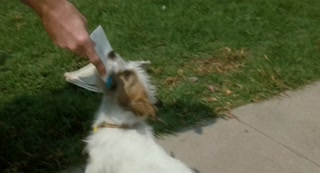

1 3438 thumbnail_3439.jpg


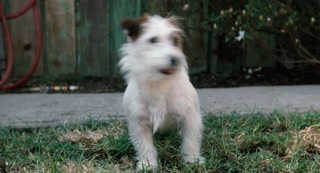

2 4994 thumbnail_4995.jpg


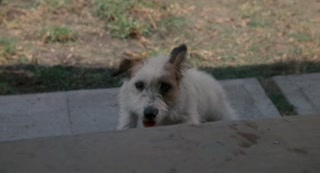

3 4992 thumbnail_4993.jpg


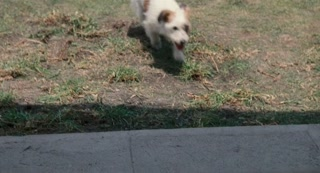

4 4826 thumbnail_4827.jpg


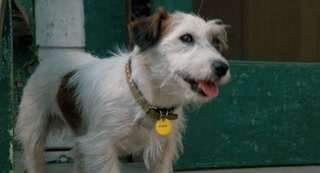

5 4996 thumbnail_4997.jpg


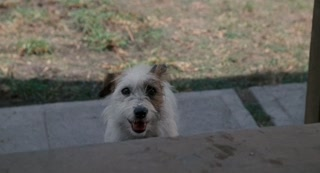

6 4825 thumbnail_4826.jpg


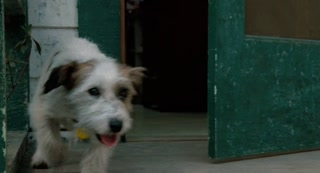

7 3435 thumbnail_3436.jpg


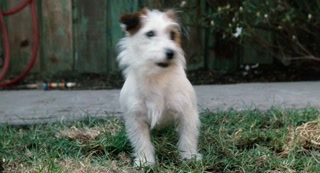

8 5005 thumbnail_5006.jpg


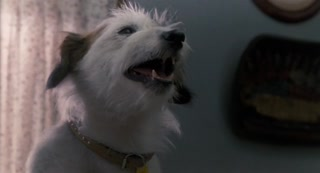

9 4993 thumbnail_4994.jpg


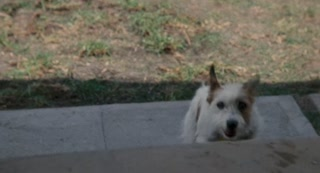

10 5007 thumbnail_5008.jpg


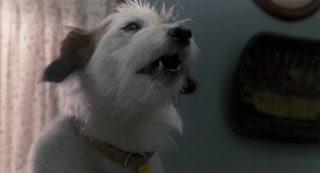

11 2130 thumbnail_2131.jpg


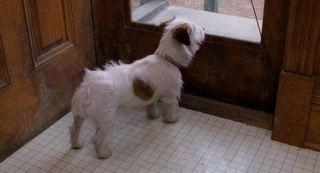

12 2129 thumbnail_2130.jpg


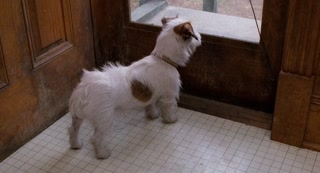

13 2135 thumbnail_2136.jpg


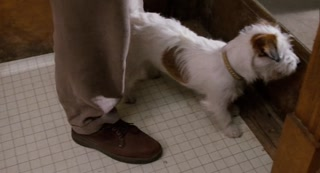

14 739 thumbnail_0740.jpg


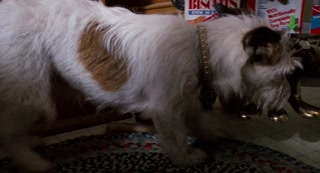

15 631 thumbnail_0632.jpg


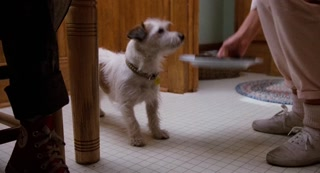

16 273 thumbnail_0274.jpg


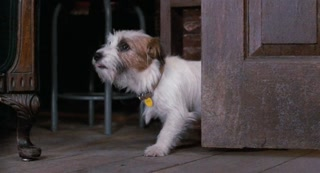

17 5373 thumbnail_5374.jpg


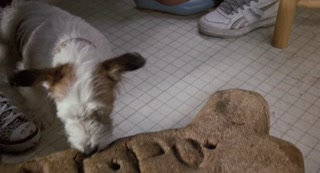

18 1432 thumbnail_1433.jpg


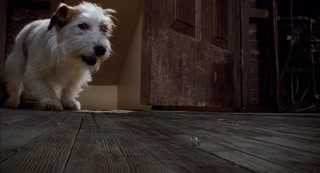

19 1431 thumbnail_1432.jpg


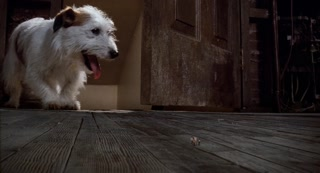

20 5001 thumbnail_5002.jpg


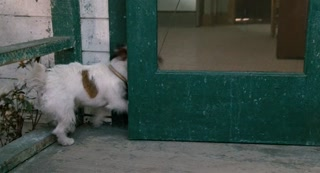

21 3426 thumbnail_3427.jpg


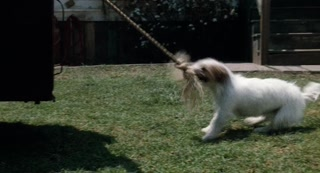

22 195 thumbnail_0196.jpg


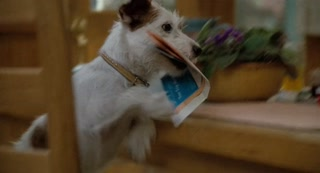

23 3392 thumbnail_3393.jpg


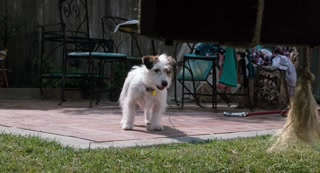

24 5066 thumbnail_5067.jpg


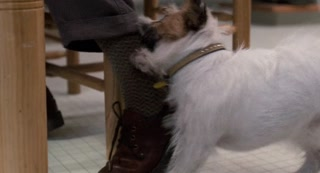

25 1472 thumbnail_1473.jpg


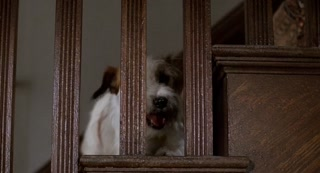

26 4997 thumbnail_4998.jpg


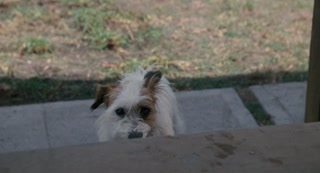

27 1632 thumbnail_1633.jpg


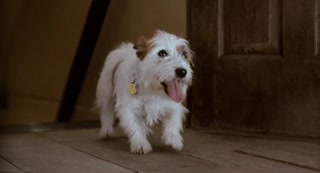

28 3420 thumbnail_3421.jpg


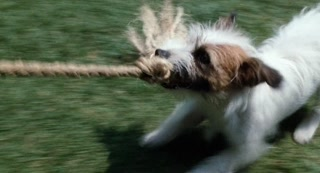

29 5012 thumbnail_5013.jpg


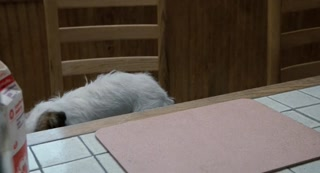

30 5065 thumbnail_5066.jpg


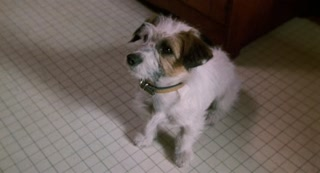

31 1485 thumbnail_1486.jpg


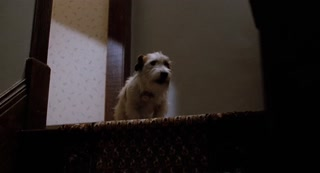

32 1634 thumbnail_1635.jpg


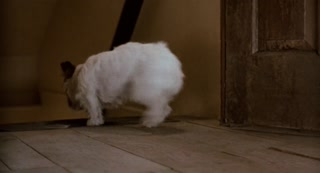

33 3417 thumbnail_3418.jpg


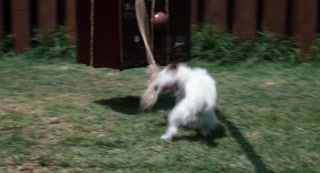

34 179 thumbnail_0180.jpg


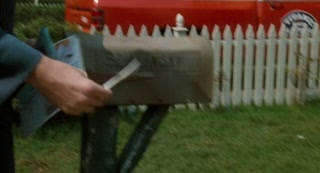

35 512 thumbnail_0513.jpg


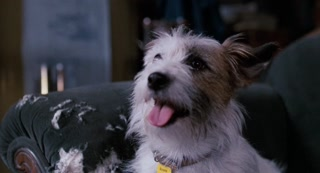

36 211 thumbnail_0212.jpg


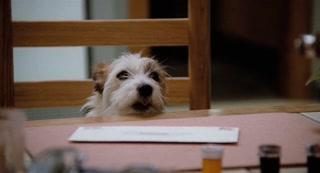

37 513 thumbnail_0514.jpg


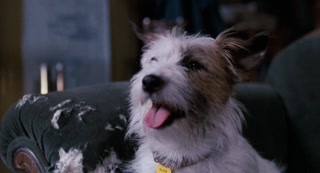

38 433 thumbnail_0434.jpg


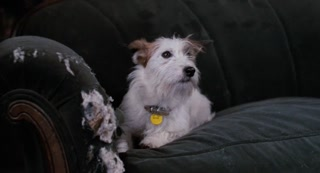

39 1703 thumbnail_1704.jpg


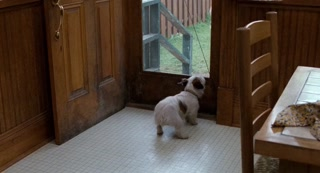

40 1470 thumbnail_1471.jpg


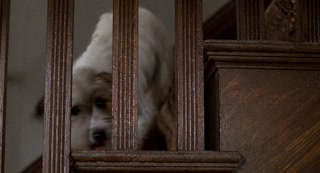

41 1626 thumbnail_1627.jpg


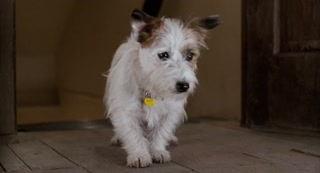

42 210 thumbnail_0211.jpg


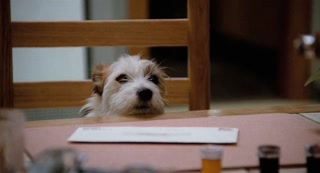

43 1486 thumbnail_1487.jpg


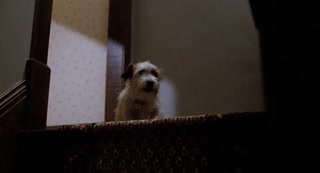

44 181 thumbnail_0182.jpg


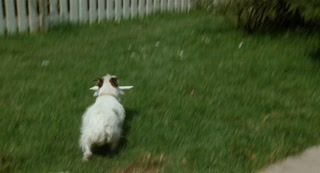

45 5004 thumbnail_5005.jpg


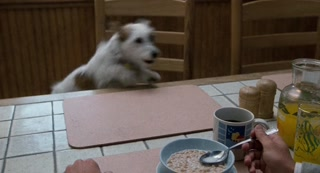

46 197 thumbnail_0198.jpg


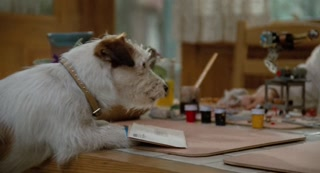

47 1704 thumbnail_1705.jpg


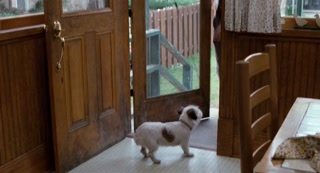

48 489 thumbnail_0490.jpg


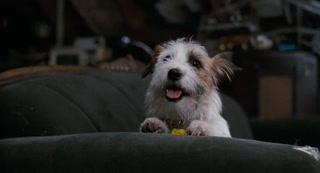

49 5038 thumbnail_5039.jpg


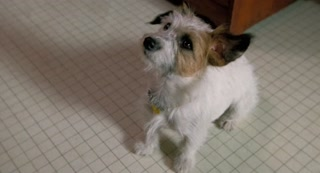

In [16]:
# Sort the index_to_distance array and keep track of the original indexes
sorted_indexes = np.argsort(index_to_distance)

# Print the sorted indexes
# print("Sorted indexes:", sorted_indexes)
num_to_show = 50
for i in range(0,num_to_show):
    print(i,sorted_indexes[i],moive_embeddings[sorted_indexes[i]]["input"])
    image_path = image_root+moive_embeddings[sorted_indexes[i]]["input"]
    # Display the image
    display(Image(filename=image_path))

### Distance Over Film to Target Word Embedding

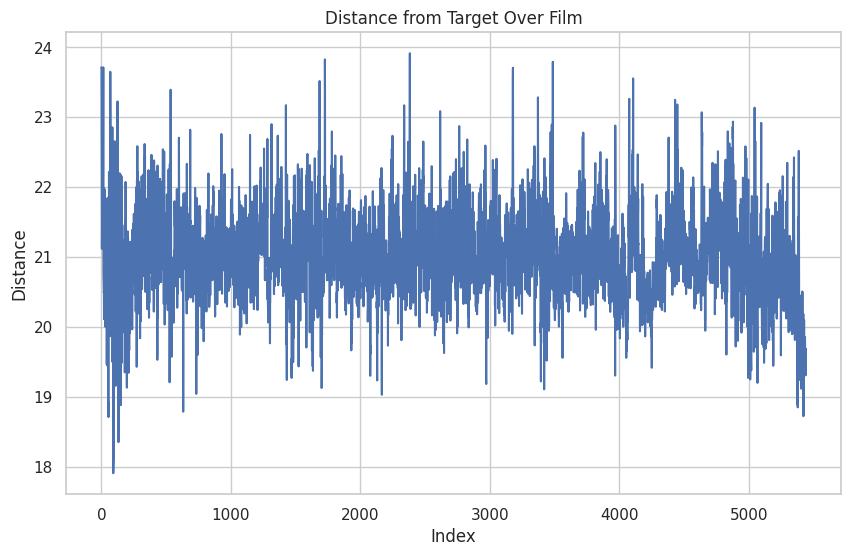

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import heapq

### from "still from a film of a white dog with brown spots" at the playground of https://replicate.com/andreasjansson/clip-features
target = json.loads("""{ "input": "still from a film of a white dog with brown spots", "embedding": [ 0.6553833484649658, 0.09570484608411789, 0.2597964406013489, 0.3939199149608612, 0.11294160783290863, 0.14587831497192383, 0.09723848104476929, 0.45007744431495667, 0.01928626000881195, -0.4131498336791992, -0.28300294280052185, 0.1541176438331604, -0.2089550793170929, 0.06594264507293701, 0.1774146854877472, -0.20785893499851227, -0.49914515018463135, 0.6917009353637695, 0.15268385410308838, -0.10603353381156921, 0.4199265241622925, 0.11988502740859985, 0.04751376062631607, 0.0011669695377349854, 0.10460381209850311, 0.1595444679260254, -0.05866546556353569, -0.1933005452156067, 0.6679984927177429, -0.11516863107681274, -0.07433611899614334, 0.4814634323120117, -0.2791634500026703, -0.08437712490558624, -0.43169838190078735, -0.07293710112571716, 0.33606892824172974, 0.0012491047382354736, -1.0337347984313965, -0.03231874108314514, 0.3165324926376343, 0.06582564115524292, 0.4645150303840637, -0.471543550491333, 0.2863098084926605, 0.059927791357040405, 0.8352203369140625, -0.14507120847702026, -0.027316629886627197, -0.8697195053100586, 0.15035434067249298, -0.05825386196374893, 0.5742846727371216, -0.07402777671813965, -0.2866688668727875, -0.4765271544456482, -0.08548972010612488, 0.44910579919815063, -0.45827972888946533, -0.30013251304626465, -0.19985777139663696, -0.14331239461898804, 0.1287613809108734, 0.34184950590133667, -0.7701635956764221, -0.034110426902770996, -0.17458929121494293, -0.15630824863910675, 0.1836441606283188, 0.14901572465896606, -0.26426687836647034, 0.2405749261379242, -0.38149556517601013, -0.5739297866821289, -0.15035918354988098, 0.2674708366394043, -0.09842067956924438, -0.2965628206729889, 0.5343369841575623, 0.20545203983783722, 0.2584007978439331, 0.2539147138595581, 0.1380504071712494, 0.22247225046157837, 0.03967660665512085, 0.1396866738796234, -0.36051061749458313, 0.13689757883548737, 0.013662435114383698, 0.0815802663564682, -0.24533525109291077, -0.11609342694282532, -0.1781555712223053, -0.1776791512966156, -0.1032947450876236, 0.17415717244148254, -0.41945570707321167, 0.4609561860561371, -0.37486782670021057, 0.369943231344223, -0.07636277377605438, 0.6307186484336853, -0.6812134385108948, -0.177305668592453, 0.4298067092895508, -0.1134733259677887, -0.3338850438594818, -0.2568882703781128, -0.10477805882692337, -0.3751308023929596, -0.4259650707244873, -0.3764221668243408, 0.019222989678382874, 0.2789171040058136, 0.23807775974273682, 0.17740100622177124, -0.43970441818237305, -0.6066102981567383, 0.3441700339317322, 0.29906216263771057, -0.9276065826416016, 0.571478009223938, 0.2541595995426178, 0.04463428258895874, 0.52508544921875, 0.3756304979324341, -0.26847290992736816, -0.12921962141990662, 0.27168771624565125, 0.009118836373090744, 0.09937209635972977, 0.1512405276298523, 0.21660438179969788, -0.7986637353897095, 0.03857211023569107, 0.05157221853733063, -0.3150009214878082, -0.04402604699134827, 0.08931944519281387, -0.6275593638420105, 0.33334603905677795, -0.06411989778280258, -0.026117689907550812, -0.3283727467060089, 0.10944981873035431, 0.0789947658777237, 0.24511870741844177, -0.07168581336736679, 0.29786962270736694, 0.16637790203094482, 0.6013399958610535, 0.028880085796117783, 0.40279528498649597, -0.49318432807922363, 0.427573025226593, -0.500418484210968, 0.2620832622051239, 0.30085691809654236, 0.5509867668151855, -0.1051064133644104, -0.22905656695365906, -0.3810265362262726, 0.6253209710121155, -0.06219026446342468, -0.6574317812919617, -1.1739585399627686, -0.588079035282135, -0.22172293066978455, 0.3786454498767853, -0.32962366938591003, 0.20015935599803925, -0.16736376285552979, 0.27755945920944214, -0.496317982673645, -0.7658069133758545, -0.0907660573720932, 0.4931630492210388, -0.6519486904144287, 0.29546526074409485, -0.31959137320518494, -0.33797407150268555, 0.06837816536426544, 0.0229945108294487, 0.08551019430160522, 0.2904478907585144, -0.07211381942033768, -0.2916056513786316, -0.21517413854599, -0.07532769441604614, -0.002509891986846924, 0.17055895924568176, 0.14445257186889648, -0.12423728406429291, -0.060455501079559326, -0.25750356912612915, 0.41882410645484924, -0.35023364424705505, 0.27545008063316345, 0.026900559663772583, 0.5379371643066406, -0.047355592250823975, 0.10663631558418274, 0.03981872648000717, 0.6007168292999268, 0.30141106247901917, -0.6182302832603455, 0.21461361646652222, -0.37965598702430725, 0.7314149141311646, 0.3180958926677704, -0.2899578809738159, -0.09301786124706268, -0.4538556933403015, -0.23813939094543457, 0.8674109578132629, 0.09953396022319794, -0.07940836250782013, -0.06252975761890411, -0.2633523941040039, -0.656445324420929, -0.444452166557312, -0.7624102830886841, 0.7956796288490295, 0.4552180767059326, 0.31025731563568115, -0.013382911682128906, 0.014170914888381958, 0.5445079803466797, -0.3119127154350281, -0.28156960010528564, 0.4714576303958893, 0.5228421092033386, 0.19442127645015717, -0.1593196541070938, -0.26028192043304443, -0.18854057788848877, -0.2456377148628235, -0.096970334649086, 0.2990967631340027, -0.2522437274456024, 0.32946792244911194, -0.04767888784408569, 0.07660838961601257, -0.6545889377593994, 0.2345026433467865, 0.8700165748596191, 0.2709062695503235, 0.7101593017578125, -0.17722612619400024, 0.3922572135925293, 1.385806918144226, 0.9283788204193115, 0.4233737885951996, 0.1871119737625122, -0.5515363812446594, 0.34835895895957947, 0.1160115897655487, 0.29372501373291016, -0.015416160225868225, -0.27795708179473877, 0.08786618709564209, 0.2675046920776367, 0.1608176827430725, -0.6732562184333801, -0.024284660816192627, -0.26734620332717896, -0.6527041792869568, -0.13719117641448975, 0.12776339054107666, 0.4923655688762665, 0.4475666284561157, -0.6472634077072144, 0.8191109299659729, -0.7366043329238892, 0.4163838028907776, 0.00435175746679306, -0.5748270750045776, 0.5318096280097961, 0.051144182682037354, -0.6290795207023621, -0.8178566098213196, 0.3305096924304962, 0.0615362823009491, -0.45590221881866455, -0.29420748353004456, 0.09072548151016235, -0.03305970877408981, 0.07410788536071777, 1.1004524230957031, 0.19453883171081543, -0.18940627574920654, -0.6139657497406006, -0.2736399471759796, -0.046748511493206024, -0.29932254552841187, -0.3408055901527405, 0.30597132444381714, 0.10662281513214111, -0.03727985918521881, 1.161851406097412, -0.16570645570755005, 1.1860707998275757, -0.18665006756782532, -0.6373411417007446, 0.548076868057251, 0.3331460952758789, -0.3654889464378357, -0.24366149306297302, 0.5924195647239685, -0.2213389128446579, 0.004280431196093559, 0.050224751234054565, 0.07954315841197968, 0.1848566234111786, -0.2581777274608612, -0.786700963973999, -4.167584419250488, -0.006657436490058899, -0.36789071559906006, 0.007292760536074638, -0.0443882942199707, -1.2240500450134277, 0.5154551863670349, 0.05828857421875, -0.5999671220779419, 0.2592504918575287, -0.2676358222961426, -0.7740139365196228, -0.06308838725090027, 0.13039392232894897, -0.10536742210388184, -0.1278514564037323, -0.2422827035188675, 0.010115444660186768, 0.005950793623924255, -0.2694217562675476, -0.010878324508666992, 0.248452827334404, -0.7271320819854736, 0.8703524470329285, 0.4907047748565674, -0.7598685622215271, -0.5016509294509888, 0.36848950386047363, 0.20837320387363434, 0.22748635709285736, -0.08243517577648163, -0.17686113715171814, 0.09163382649421692, -0.5155341625213623, 0.1959148347377777, -0.257031112909317, 0.09019676595926285, 0.7609604001045227, -0.40700429677963257, 0.109458789229393, 0.7322179079055786, -0.22803600132465363, 0.5095354914665222, 0.01312282681465149, -0.26803916692733765, 0.6042470932006836, 0.4025666117668152, -0.37546080350875854, 0.46887141466140747, 0.6134055852890015, 0.759523332118988, -0.1350068598985672, 0.08718517422676086, 0.22378221154212952, -0.3347223103046417, -1.1612999439239502, 0.19646140933036804, -0.30876243114471436, -0.19534900784492493, 0.8839824199676514, -0.12285387516021729, -0.19395121932029724, -0.15535980463027954, 0.5761786103248596, -0.2125316858291626, 0.2015679031610489, 0.38751572370529175, 0.10372035205364227, -0.3885340988636017, -0.8756797313690186, 0.5869319438934326, 0.7406719923019409, -0.42206838726997375, 0.07270379364490509, -0.4618379771709442, 0.2207993119955063, 0.37204140424728394, 0.1369534432888031, -0.08296691626310349, 0.10137785226106644, -0.11949518322944641, 0.21298211812973022, 0.5763778686523438, -0.5061917304992676, 0.04613368213176727, 0.5509812831878662, 1.2088826894760132, -0.30160561203956604, -0.16544964909553528, 0.2886725664138794, 0.4452691078186035, -0.032291561365127563, -0.26229986548423767, 0.3146539032459259, 0.1506185531616211, -0.5689691305160522, 0.08925250917673111, -0.17765209078788757, -0.3610358238220215, -0.10470589995384216, -0.6983790397644043, 0.15029528737068176, -0.36668720841407776, -0.5952653884887695, -0.5680088400840759, -0.8156375885009766, 0.09730890393257141, -0.16665789484977722, 0.05319793522357941, 0.20430786907672882, -0.4122234880924225, 0.3009076714515686, -0.1500152349472046, 0.31852245330810547, -0.4568992257118225, 0.174430251121521, 0.11328350007534027, -0.15855863690376282, 0.3441186547279358, 1.1281179189682007, -0.003911629319190979, -0.9022074937820435, 0.3708024024963379, 0.04715956747531891, 4.572140693664551, -0.08717986196279526, 0.3975503444671631, 0.13930080831050873, -0.6382026076316833, -0.22575253248214722, 0.8129714131355286, -0.2157084345817566, -0.15450190007686615, 0.6498236060142517, 0.28017759323120117, -0.011752024292945862, -0.30703407526016235, 0.42159104347229004, 0.5012994408607483, 0.6526696085929871, 0.35755956172943115, -0.2167971283197403, -0.7014251947402954, 0.03077918291091919, 0.3138786554336548, 0.5218672752380371, -0.17019256949424744, 1.0403180122375488, 0.3545677065849304, 0.43569082021713257, 0.9097896218299866, 0.16862083971500397, 0.3181403875350952, 0.29771047830581665, 0.00006383657455444336, -0.4528543949127197, 0.5728368759155273, -0.21993771195411682, -0.01905442774295807, 0.3204733729362488, 0.3343545198440552, -0.027808547019958496, -0.5724647641181946, 0.7102595567703247, -0.10047710686922073, 0.06682795286178589, 0.24851776659488678, 0.11661255359649658, -0.32000863552093506, 0.24498391151428223, 0.21919025480747223, -0.33058077096939087, -0.03350600600242615, -0.17567750811576843, 0.05010917782783508, -0.6421510577201843, -0.2648419141769409, 0.3757409453392029, -0.3378026485443115, -0.5112784504890442, -0.4269937574863434, -0.6503196954727173, -0.18741172552108765, -0.4361669421195984, 0.17343643307685852, -0.7014541625976562, -0.6806865930557251, 0.11826580762863159, 0.46583762764930725, -0.1714639961719513, -0.20210382342338562, 0.325713574886322, -0.6085943579673767, 0.9894194602966309, 0.6890652179718018, -0.34839415550231934, -0.08511556684970856, -0.3375510573387146, -0.299291729927063, 0.40359196066856384, 0.9079965353012085, -0.5637936592102051, -0.27887797355651855, 0.5486034154891968, -0.10002467781305313, -0.06105300784111023, -0.3723973333835602, -0.32837218046188354, -0.11623881757259369, -0.2760133147239685, 0.42117470502853394, -0.7335142493247986, -0.5542870759963989, 0.7512011528015137, 0.1114894449710846, -0.03740471601486206, -0.9139333963394165, -0.16873770952224731, -0.17384108901023865, 0.012999694794416428, 0.2202174961566925, -0.38045066595077515, -0.034562818706035614, 0.8982976078987122, 0.305980920791626, 0.5788223743438721, 0.3341722786426544, 0.6049051880836487, -0.7482359409332275, -0.1721939593553543, 0.3128870725631714, -0.2425915002822876, 0.4050653278827667, -0.0018253475427627563, -0.5146963000297546, -0.3122074007987976, 0.02647089958190918, -0.7595198154449463, 0.8273786306381226, 0.3095300793647766, -1.0794239044189453, -0.6564955711364746, -0.47409510612487793, -0.3387167453765869, 0.9650495648384094, 0.43777263164520264, -0.2011452615261078, 0.16315490007400513, -0.7118547558784485, 0.15428876876831055, 0.2669811546802521, 0.11696934700012207, -0.19212061166763306, 0.28818225860595703, -0.23919489979743958, -0.3513544797897339, -0.5108467936515808, 0.3252759575843811, -0.4879816770553589, -0.002562999725341797, 0.8388850688934326, 0.9060772657394409, 0.04161415994167328, -0.06842082738876343, 0.40889430046081543, -0.17202578485012054, 0.14529713988304138, 0.6703850030899048, -1.2012524604797363, 0.04503913223743439, 0.2342967391014099, 0.10064689815044403, 0.08197857439517975, 0.7429763078689575, -0.808298647403717, -0.14069098234176636, -0.5238596200942993, 0.13091765344142914, -0.19632288813591003, -0.18238449096679688, -0.2681145966053009, -0.682623565196991, 0.002732396125793457, 0.01324838399887085, 0.36455920338630676, 0.04791402444243431, -0.12270066142082214, -0.278991162776947, 0.5013149380683899, -0.8283038139343262, 0.29448947310447693, -0.398439884185791, -0.3593168556690216, 0.00719839334487915, -0.15822389721870422, 0.2680588364601135, 0.15261946618556976, 0.18420183658599854, -0.32694703340530396, -0.03512971103191376, 0.10088104009628296, -0.7355679273605347, 0.3138920068740845, 0.5891944169998169, 0.2976493835449219, 0.34919893741607666, 0.47890448570251465, -0.3609863519668579, -0.30456751585006714, 0.6711216568946838, -0.042034417390823364, -0.2611890435218811, 0.304685115814209, 0.3665439188480377, 0.6053243279457092, 0.27018648386001587, -0.15362104773521423, 0.20021943747997284, 0.46136122941970825, 0.3045268654823303, 0.35972458124160767, -0.03209282457828522, 0.2479243278503418, -0.5578409433364868, 0.08510378748178482, -0.009984210133552551, 0.3310143053531647, -0.1266259402036667, 0.1967417299747467, 0.3196132779121399, -0.3804611563682556, -0.16077077388763428, 0.43539729714393616, 0.13466644287109375, -0.5749642848968506, -1.3062424659729004, -0.3557504117488861, -0.0484856441617012, 0.41645583510398865, 0.49292418360710144, -0.11646053194999695, -0.014272138476371765, 0.048082053661346436, 0.7471538186073303, 0.23308131098747253, 0.3836336135864258, -0.37255042791366577, 0.10504432022571564, 0.21189479529857635, 0.08889320492744446, -0.18577000498771667, -0.7144237756729126, -0.18408124148845673, 0.8184738159179688, -0.42178651690483093, -0.6393660306930542, -0.05102880671620369, -0.6747309565544128, -0.5831612944602966, -0.21859648823738098, -0.23023733496665955, 0.39178699254989624, 0.36736631393432617, 0.07248568534851074, 0.7974371910095215, -0.424513041973114, 0.22943881154060364, 0.029955178499221802, 0.10765261948108673, -0.007710158824920654, 0.05405975878238678, -0.1334572583436966, 0.09920188784599304, -0.2117985486984253, 0.6222590208053589, 0.018790453672409058, 0.7910397052764893, -0.33511975407600403, -0.4675123691558838, -0.1567360758781433, -0.010459542274475098, 0.28496891260147095, 0.3530232310295105, -0.14223036170005798, -0.2500545382499695, 0.036339253187179565, -0.5481878519058228, -0.6597491502761841, 0.31052398681640625, 0.4928356111049652, 0.20996300876140594, -0.1158258244395256, -0.42534375190734863, -0.14808884263038635, -0.7619961500167847, 0.4633506238460541, -0.041132643818855286, 0.2232387363910675, -0.3565862774848938, -0.22470623254776, 0.24574309587478638, -0.14573581516742706, -0.34477803111076355, -0.0788915753364563, -0.00015988945960998535, 1.240025520324707, 0.3549628257751465, -0.5538991689682007, 0.6147966384887695, -0.7162015438079834, 1.1673129796981812, -0.0991259291768074, -0.5943825244903564, 0.5430852174758911, 0.5849528312683105, 0.11550301313400269, 0.01537390798330307, -0.3083929717540741, 0.2712138295173645, -0.28863614797592163, 0.5007662773132324, -0.49281877279281616, 0.2073223739862442, -0.47672325372695923, -0.19365857541561127, 0.566368818283081, -0.013080939650535583, -0.09603454172611237, -0.5760890245437622, -0.042027413845062256, 0.6803206205368042, -0.14956961572170258, -0.0419236421585083, -0.059528157114982605, 0.14760705828666687, 0.1477353870868683, 0.5640376210212708, 0.08042660355567932, 0.43378692865371704, -0.6249822378158569, 0.2654624581336975, 0.5654584169387817, -0.4949023425579071, -0.31361714005470276, -0.29985395073890686, -0.24653765559196472, 0.07769742608070374, 0.6754165291786194, 0.12296737730503082, -0.5455498695373535, -0.15122614800930023, -0.17090529203414917 ] }""")
image_path = image_root+target["input"]

index_to_distance = []

# Iterate through the input list
for emb in moive_embeddings:
    current_dist = euclidean_distance(emb["embedding"], target["embedding"])
    index_to_distance.append(current_dist)

# Create a plot using Seaborn
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(10, 6))  # Set the figure size
sns.lineplot(x=range(len(index_to_distance)), y=index_to_distance)  # Plot the array with index as x-axis
plt.xlabel("Index")  # Set the x-axis label
plt.ylabel("Distance")  # Set the y-axis label
plt.title("Distance from Target Over Film")  # Set the title
plt.show()  # Show the plot

0 92 thumbnail_0093.jpg


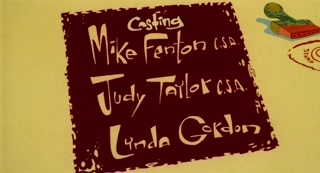

1 93 thumbnail_0094.jpg


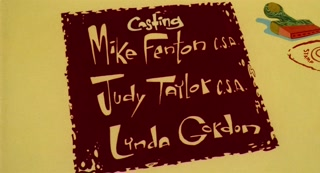

2 94 thumbnail_0095.jpg


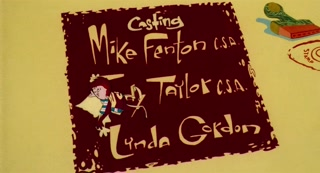

3 95 thumbnail_0096.jpg


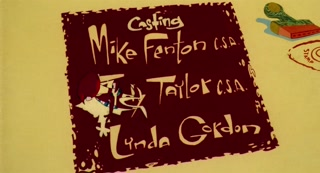

4 132 thumbnail_0133.jpg


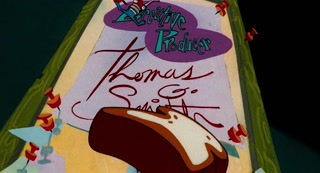

5 55 thumbnail_0056.jpg


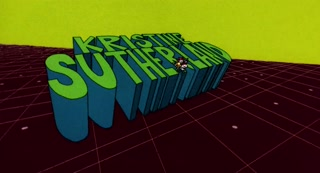

6 5421 thumbnail_5422.jpg


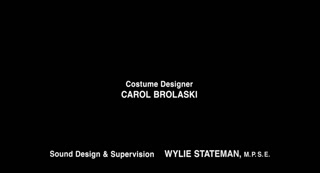

7 53 thumbnail_0054.jpg


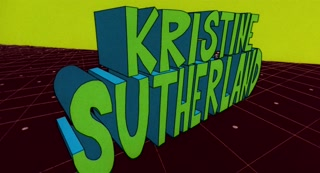

8 632 thumbnail_0633.jpg


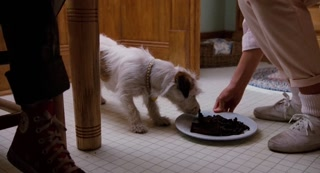

9 5377 thumbnail_5378.jpg


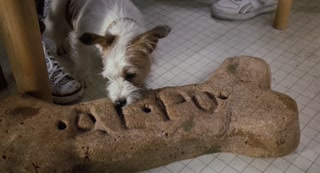

10 133 thumbnail_0134.jpg


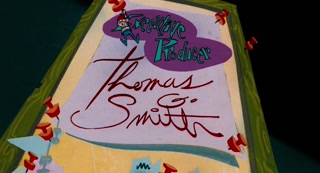

11 134 thumbnail_0135.jpg


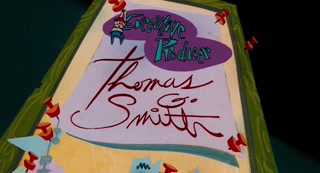

12 150 thumbnail_0151.jpg


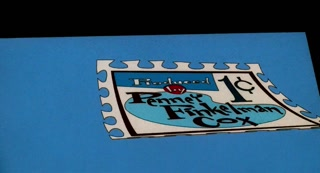

13 5374 thumbnail_5375.jpg


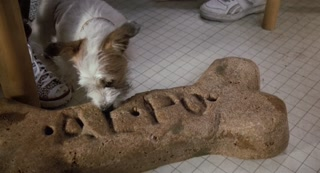

14 54 thumbnail_0055.jpg


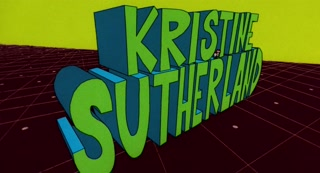

15 5375 thumbnail_5376.jpg


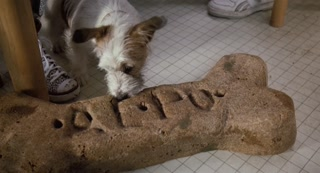

16 2166 thumbnail_2167.jpg


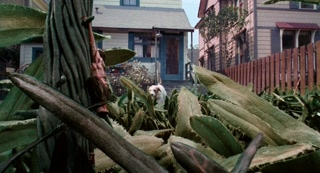

17 733 thumbnail_0734.jpg


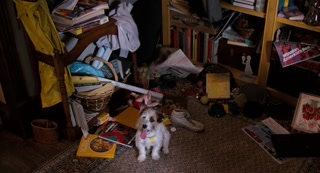

18 5376 thumbnail_5377.jpg


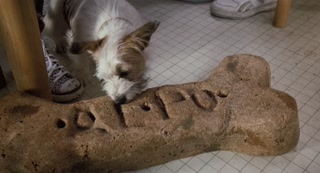

19 5422 thumbnail_5423.jpg


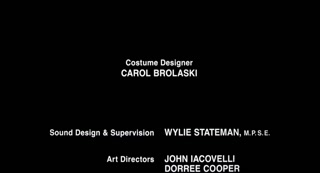

20 3419 thumbnail_3420.jpg


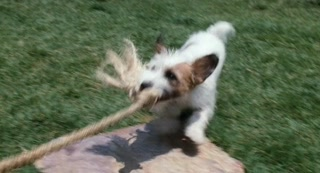

21 5403 thumbnail_5404.jpg


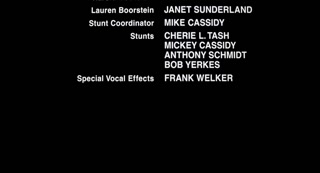

22 1701 thumbnail_1702.jpg


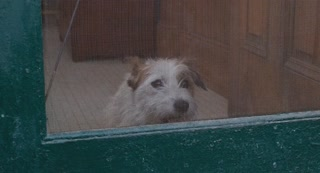

23 197 thumbnail_0198.jpg


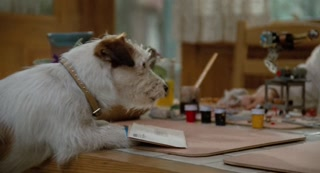

24 5373 thumbnail_5374.jpg


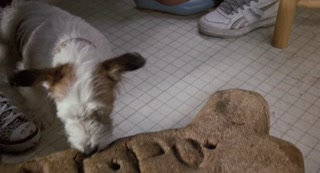

25 5409 thumbnail_5410.jpg


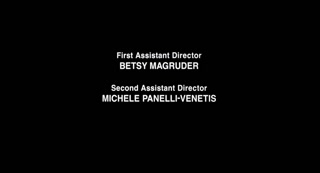

26 110 thumbnail_0111.jpg


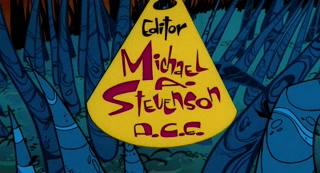

27 5408 thumbnail_5409.jpg


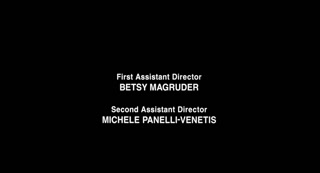

28 2972 thumbnail_2973.jpg


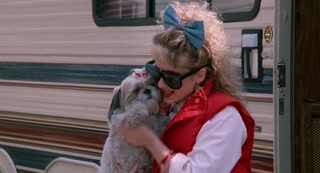

29 5066 thumbnail_5067.jpg


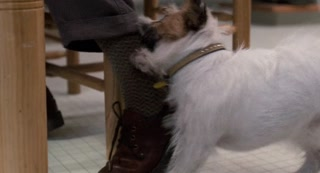

30 527 thumbnail_0528.jpg


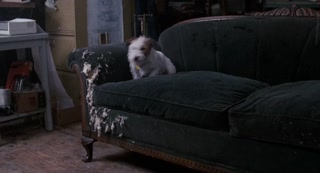

31 5418 thumbnail_5419.jpg


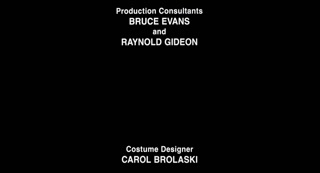

32 3394 thumbnail_3395.jpg


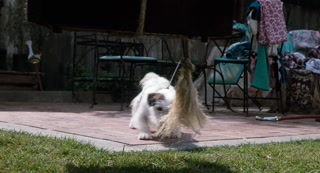

33 5400 thumbnail_5401.jpg


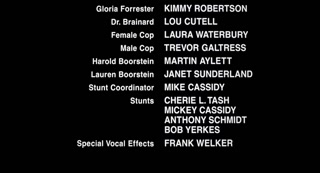

34 2130 thumbnail_2131.jpg


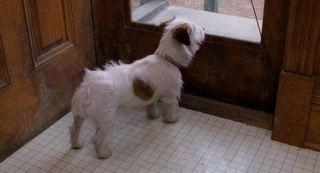

35 1432 thumbnail_1433.jpg


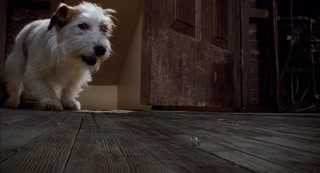

36 5402 thumbnail_5403.jpg


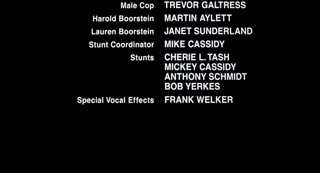

37 5010 thumbnail_5011.jpg


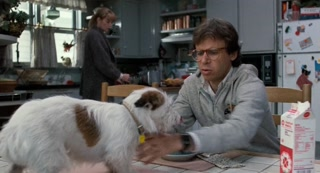

38 5390 thumbnail_5391.jpg


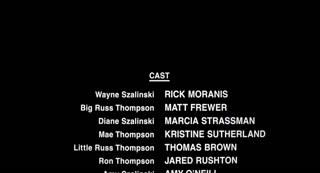

39 2971 thumbnail_2972.jpg


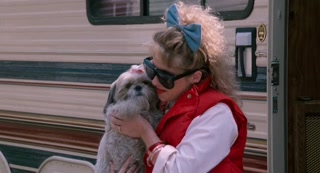

40 5392 thumbnail_5393.jpg


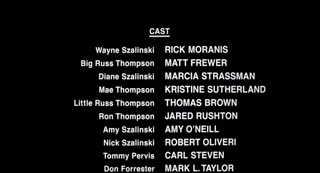

41 4994 thumbnail_4995.jpg


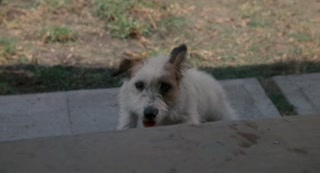

42 1469 thumbnail_1470.jpg


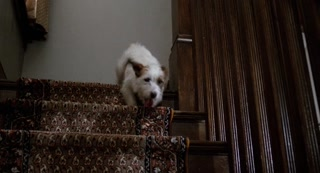

43 2129 thumbnail_2130.jpg


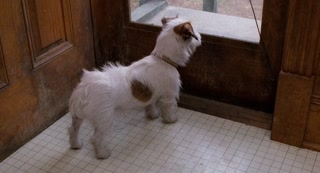

44 4996 thumbnail_4997.jpg


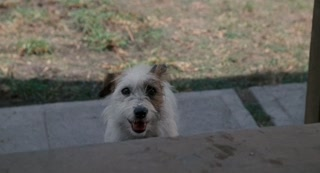

45 2076 thumbnail_2077.jpg


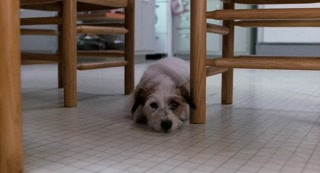

46 3967 thumbnail_3968.jpg


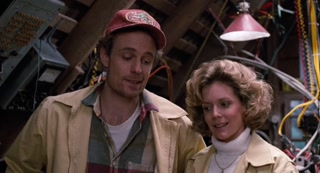

47 5436 thumbnail_5437.jpg


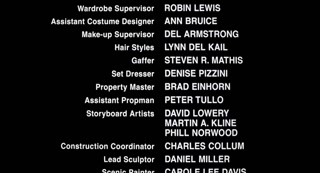

48 1471 thumbnail_1472.jpg


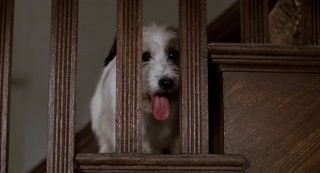

49 5439 thumbnail_5440.jpg


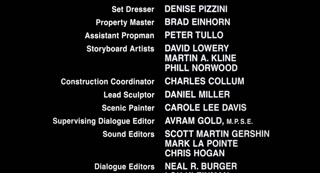

In [65]:
# Sort the index_to_distance array and keep track of the original indexes
sorted_indexes = np.argsort(index_to_distance)

# Print the sorted indexes
# print("Sorted indexes:", sorted_indexes)
num_to_show = 50
for i in range(0,num_to_show):
    print(i,sorted_indexes[i],moive_embeddings[sorted_indexes[i]]["input"])
    image_path = image_root+moive_embeddings[sorted_indexes[i]]["input"]
    # Display the image
    display(Image(filename=image_path))

In [17]:
moive_embeddings[0]

{'input': 'thumbnail_0001.jpg',
 'embedding': [-0.3141614496707916,
  0.21892297267913818,
  0.10630946606397629,
  -1.0737407207489014,
  -0.14155027270317078,
  0.10630404204130173,
  0.6218047738075256,
  -0.31840187311172485,
  0.13576644659042358,
  -0.8715311884880066,
  -0.028382882475852966,
  -0.7489148378372192,
  -0.4926939606666565,
  -0.8100481033325195,
  -0.03798965364694595,
  0.029798194766044617,
  -0.04123324155807495,
  -0.14592993259429932,
  -0.22605234384536743,
  0.06170624494552612,
  0.1367204487323761,
  0.5255715847015381,
  0.04877495393157005,
  -0.0702555924654007,
  -0.25562191009521484,
  0.24572815001010895,
  -0.13834156095981598,
  -0.452525794506073,
  0.426151305437088,
  -0.8569238185882568,
  -0.37028250098228455,
  0.033300697803497314,
  0.44591617584228516,
  0.1128811240196228,
  0.48469510674476624,
  -0.22459447383880615,
  0.12260260432958603,
  0.11869348585605621,
  -0.3089028596878052,
  -0.19949746131896973,
  0.37970712780952454,
  0.

## Dimensionality Reduction(tSNE and K-Means Clustering

In [32]:
import re
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt



/home/rhema/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/rhema/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5bd0097940>
Traceback (most recent call last):
  File "/home/rhema/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/rhema/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/rhema/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 6

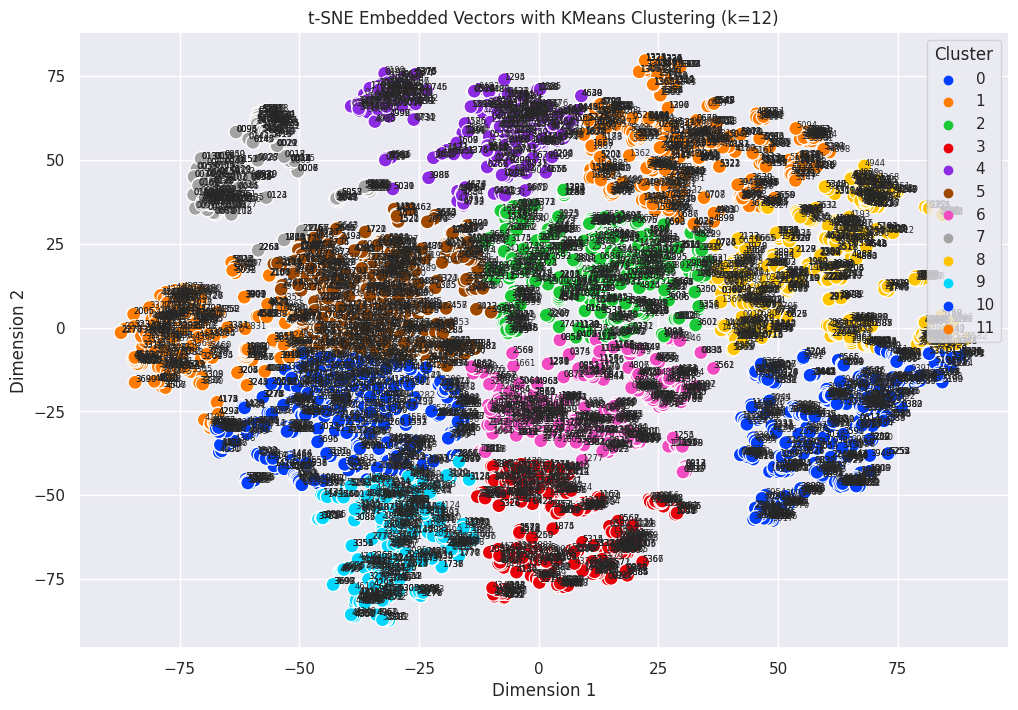

In [34]:
embeddings = np.array([vector['embedding'] for vector in moive_embeddings])

# Using t-SNE to embed the vectors into 2D
tsne = TSNE(n_components=2, random_state=42)
embedded_vectors = tsne.fit_transform(embeddings)

# Performing KMeans clustering with k=12
kmeans = KMeans(n_clusters=12, random_state=42)
clusters = kmeans.fit_predict(embedded_vectors)

# Extracting numbers from file names for labels
labels = [re.search(r'\d+', vector['input']).group() for vector in moive_embeddings]

# Plotting the embedded vectors with cluster coloring
sns.set()
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.scatterplot(x=embedded_vectors[:, 0], y=embedded_vectors[:, 1], hue=clusters, palette='bright', legend='full', s=100)
for i, vec in enumerate(embedded_vectors):
    plt.text(vec[0] + 0.02, vec[1] + 0.02, labels[i], fontsize=6)  # Adding labels
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Embedded Vectors with KMeans Clustering (k=12)')
plt.legend(title='Cluster')
plt.show()



In [36]:
# Initialize 12 lists to store indexes for each cluster
cluster_indexes = [[] for _ in range(12)]

# Populate lists with indexes
for i, cluster in enumerate(clusters):
    cluster_indexes[cluster].append(i)

# # Printing the indexes for each cluster
# for i, indexes in enumerate(cluster_indexes):
#     print(f'Cluster {i + 1}: {indexes}')


## Counting Per Cluster

In [39]:
for i in range(0,12):
    print("cluster",i,len(cluster_indexes[i]))

cluster 0 522
cluster 1 351
cluster 2 529
cluster 3 408
cluster 4 385
cluster 5 577
cluster 6 429
cluster 7 241
cluster 8 595
cluster 9 374
cluster 10 525
cluster 11 505


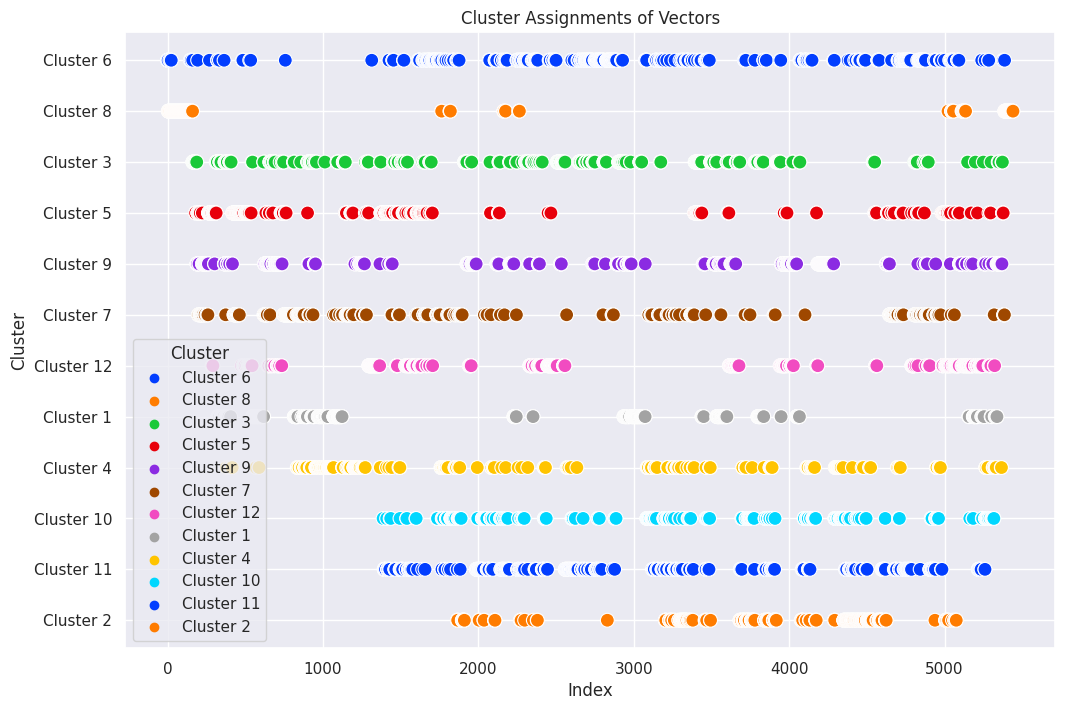

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the state from the previous code

# Create a list of cluster assignments for each vector
cluster_labels = [f'Cluster {cluster + 1}' for cluster in clusters]

# Plotting the scatter plot
sns.set()
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.scatterplot(x=np.arange(len(moive_embeddings)), y=cluster_labels, hue=cluster_labels, palette='bright', legend='full', s=100)
plt.xlabel('Index')
plt.ylabel('Cluster')
plt.title('Cluster Assignments of Vectors')
plt.legend(title='Cluster')
plt.show()


   ## Showing Images From the Cluster

553 3049 thumbnail_0554.jpg


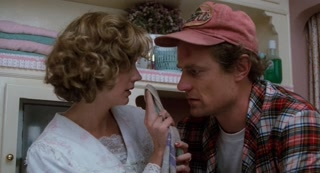

554 1691 thumbnail_0555.jpg


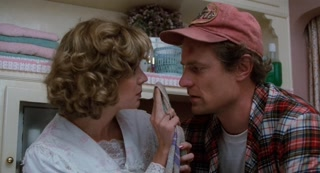

555 3787 thumbnail_0556.jpg


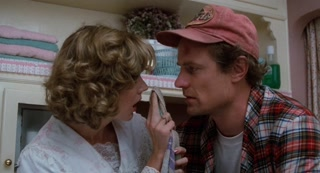

556 1868 thumbnail_0557.jpg


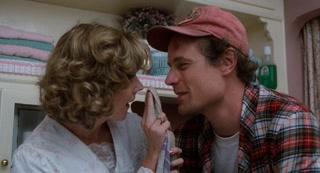

557 2540 thumbnail_0558.jpg


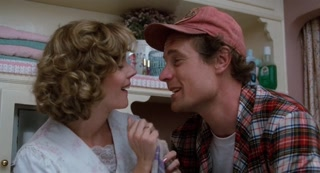

558 1094 thumbnail_0559.jpg


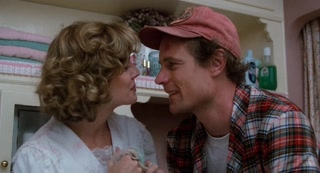

559 316 thumbnail_0560.jpg


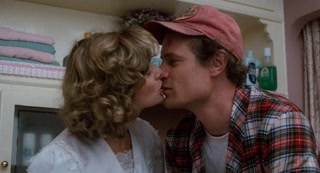

560 2551 thumbnail_0561.jpg


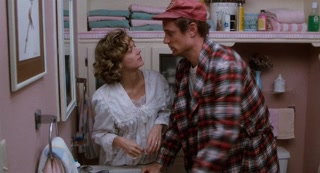

561 4580 thumbnail_0562.jpg


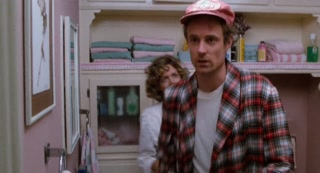

562 4829 thumbnail_0563.jpg


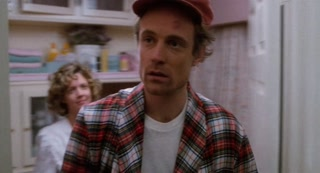

563 2710 thumbnail_0564.jpg


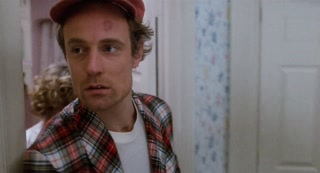

564 3725 thumbnail_0565.jpg


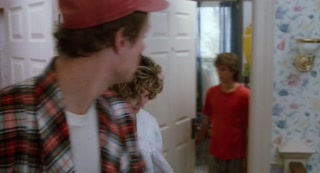

565 344 thumbnail_0566.jpg


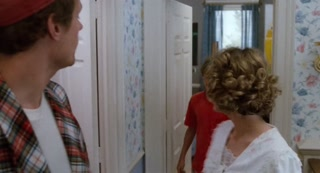

568 2717 thumbnail_0569.jpg


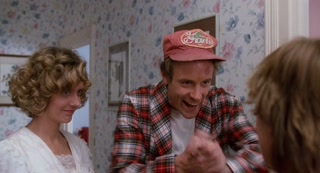

569 2777 thumbnail_0570.jpg


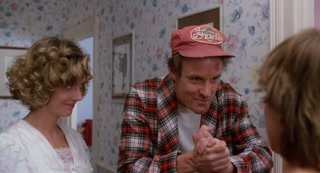

572 3602 thumbnail_0573.jpg


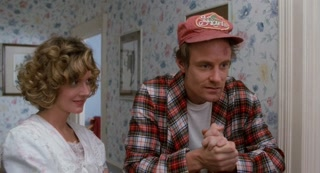

573 2834 thumbnail_0574.jpg


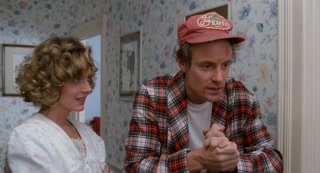

574 1117 thumbnail_0575.jpg


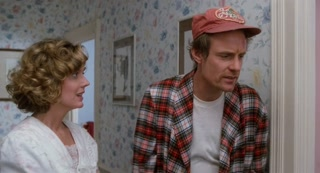

575 1592 thumbnail_0576.jpg


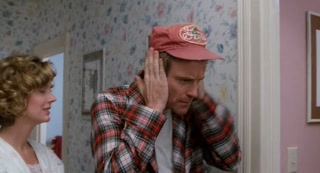

576 932 thumbnail_0577.jpg


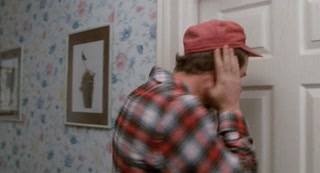

577 352 thumbnail_0578.jpg


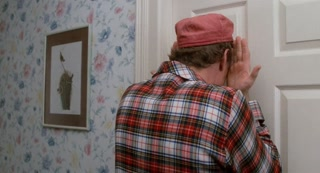

578 2848 thumbnail_0579.jpg


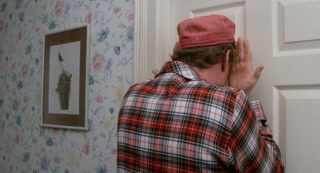

579 4891 thumbnail_0580.jpg


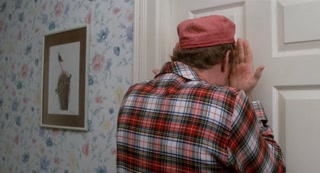

580 372 thumbnail_0581.jpg


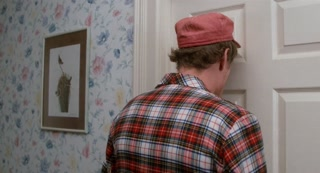

581 154 thumbnail_0582.jpg


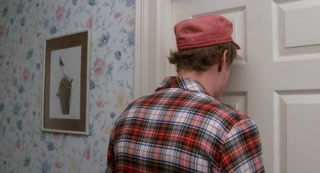

582 4900 thumbnail_0583.jpg


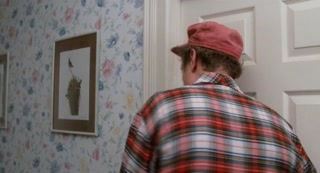

583 2174 thumbnail_0584.jpg


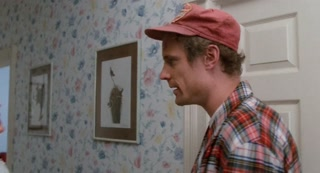

584 2230 thumbnail_0585.jpg


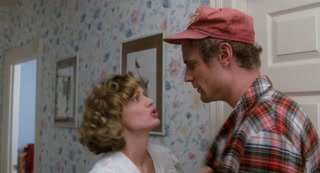

585 2337 thumbnail_0586.jpg


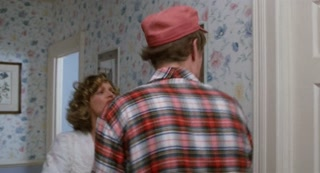

586 393 thumbnail_0587.jpg


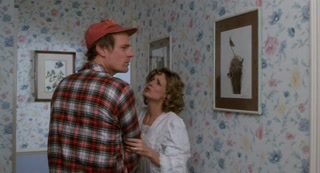

587 2232 thumbnail_0588.jpg


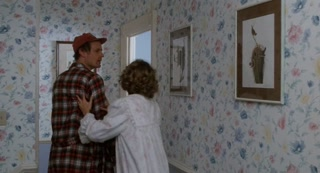

590 2460 thumbnail_0591.jpg


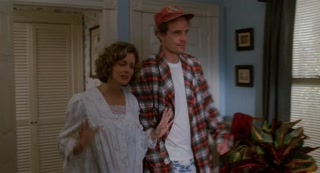

591 4622 thumbnail_0592.jpg


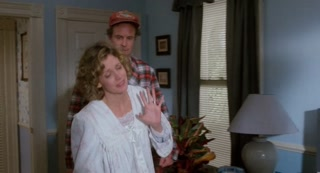

592 1698 thumbnail_0593.jpg


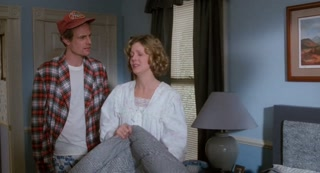

593 3801 thumbnail_0594.jpg


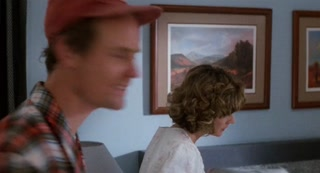

594 1964 thumbnail_0595.jpg


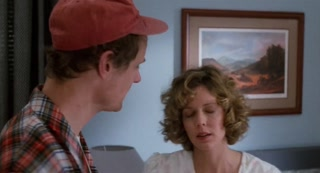

595 2813 thumbnail_0596.jpg


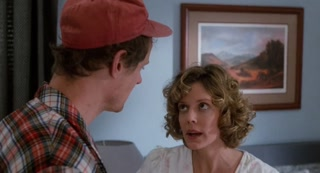

596 4669 thumbnail_0597.jpg


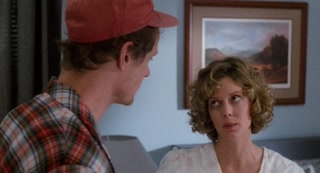

597 2806 thumbnail_0598.jpg


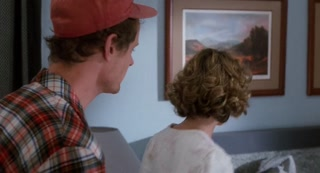

598 2137 thumbnail_0599.jpg


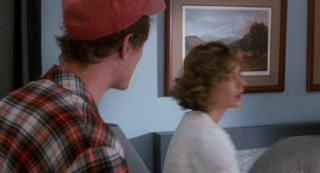

599 3815 thumbnail_0600.jpg


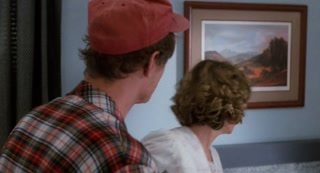

600 2073 thumbnail_0601.jpg


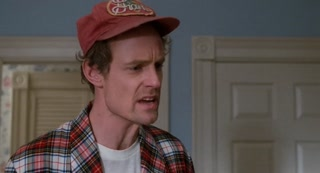

601 2396 thumbnail_0602.jpg


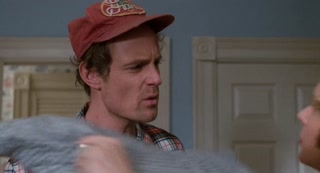

602 3783 thumbnail_0603.jpg


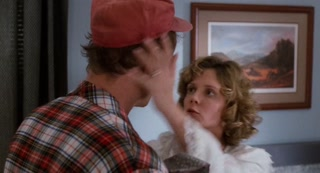

603 948 thumbnail_0604.jpg


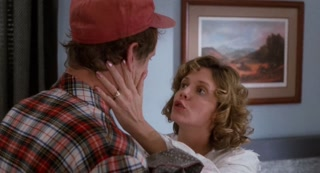

604 914 thumbnail_0605.jpg


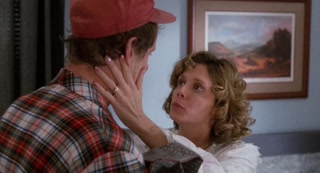

605 1079 thumbnail_0606.jpg


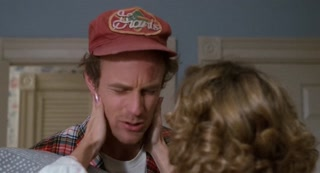

606 1484 thumbnail_0607.jpg


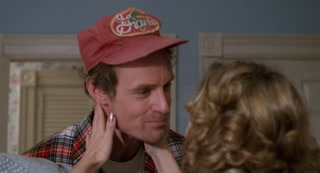

607 1971 thumbnail_0608.jpg


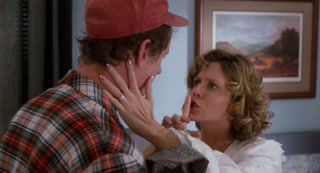

608 2498 thumbnail_0609.jpg


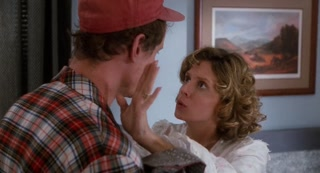

609 2315 thumbnail_0610.jpg


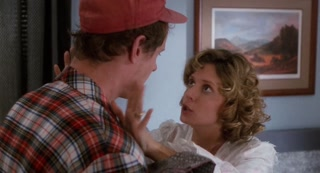

610 809 thumbnail_0611.jpg


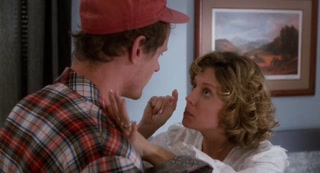

611 852 thumbnail_0612.jpg


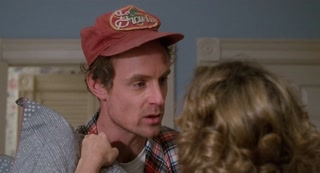

612 1132 thumbnail_0613.jpg


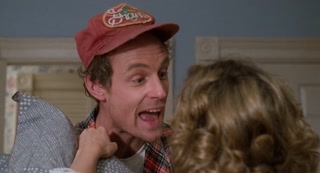

613 4453 thumbnail_0614.jpg


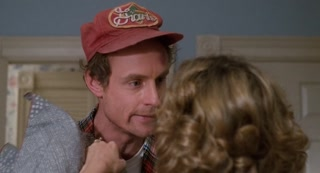

614 4581 thumbnail_0615.jpg


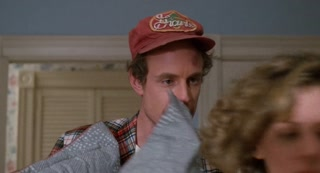

615 2934 thumbnail_0616.jpg


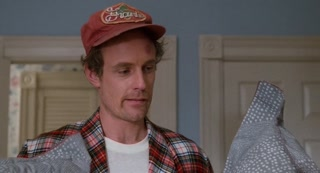

616 4888 thumbnail_0617.jpg


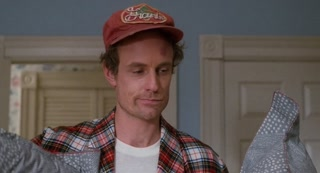

617 2708 thumbnail_0618.jpg


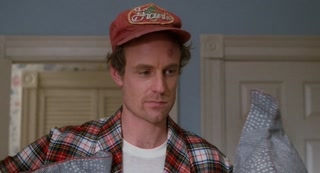

618 2799 thumbnail_0619.jpg


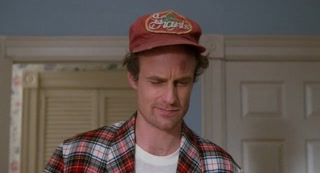

816 2790 thumbnail_0817.jpg


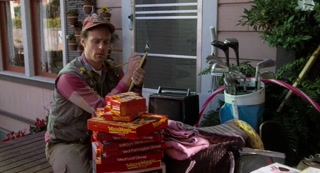

817 3473 thumbnail_0818.jpg


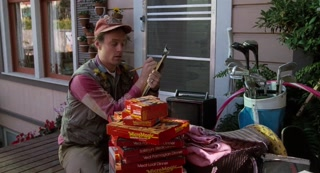

818 1876 thumbnail_0819.jpg


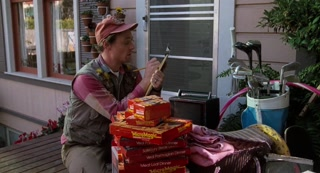

819 4747 thumbnail_0820.jpg


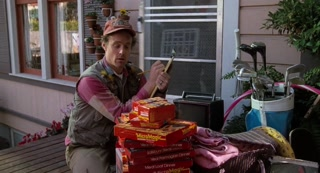

820 1761 thumbnail_0821.jpg


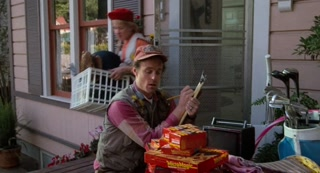

821 3433 thumbnail_0822.jpg


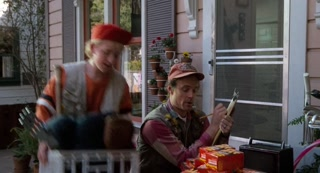

822 4177 thumbnail_0823.jpg


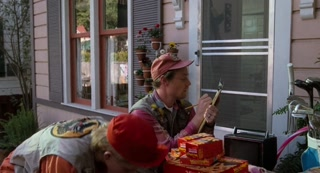

823 293 thumbnail_0824.jpg


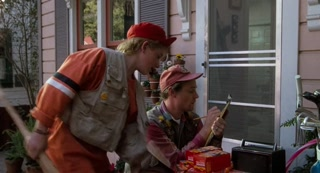

824 2855 thumbnail_0825.jpg


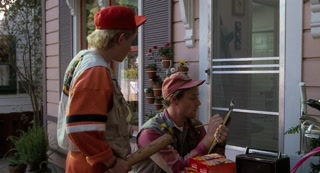

825 2339 thumbnail_0826.jpg


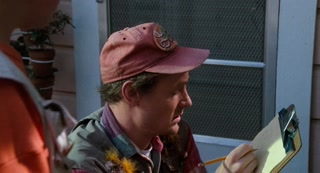

826 1164 thumbnail_0827.jpg


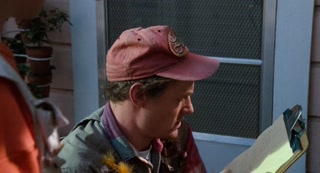

827 2768 thumbnail_0828.jpg


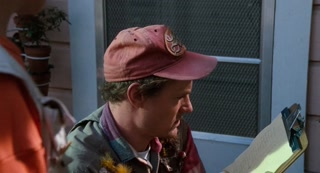

828 2714 thumbnail_0829.jpg


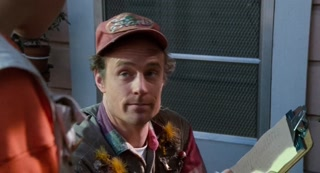

829 2720 thumbnail_0830.jpg


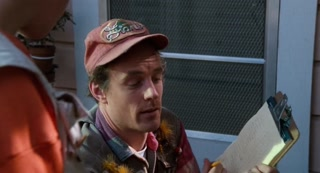

830 2702 thumbnail_0831.jpg


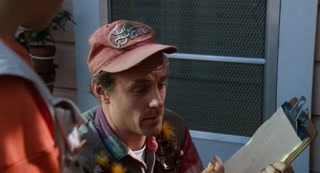

831 4730 thumbnail_0832.jpg


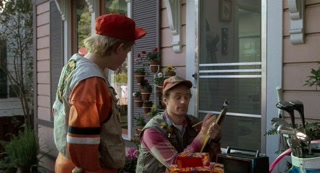

832 1635 thumbnail_0833.jpg


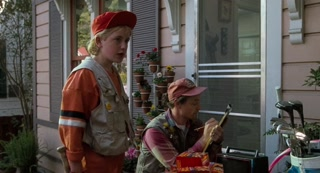

837 2915 thumbnail_0838.jpg


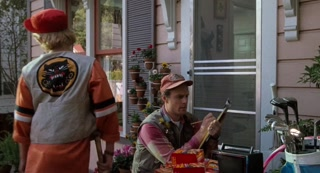

838 2457 thumbnail_0839.jpg


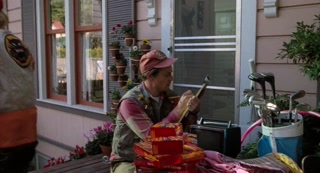

839 3727 thumbnail_0840.jpg


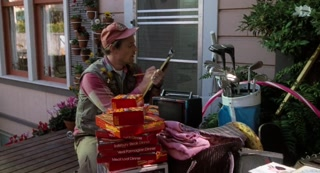

865 4668 thumbnail_0866.jpg


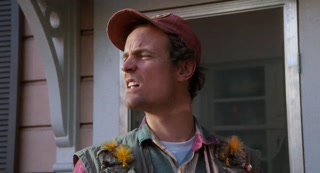

876 2711 thumbnail_0877.jpg


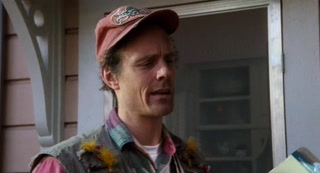

877 245 thumbnail_0878.jpg


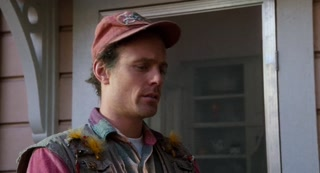

878 3056 thumbnail_0879.jpg


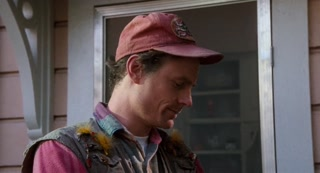

880 3408 thumbnail_0881.jpg


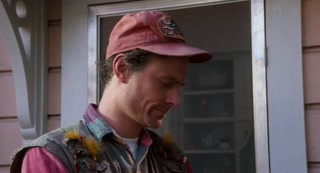

881 5050 thumbnail_0882.jpg


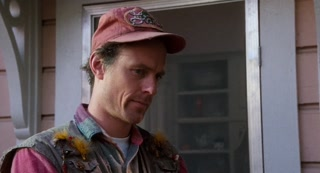

882 565 thumbnail_0883.jpg


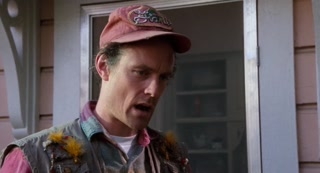

889 4758 thumbnail_0890.jpg


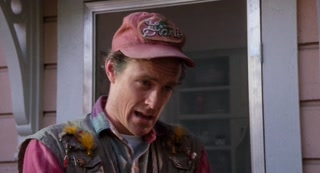

890 619 thumbnail_0891.jpg


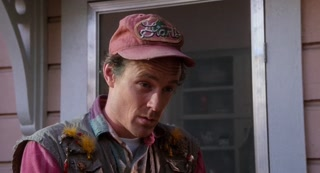

891 1230 thumbnail_0892.jpg


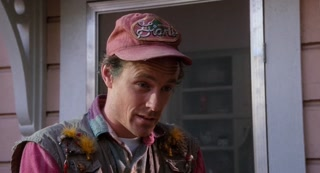

892 593 thumbnail_0893.jpg


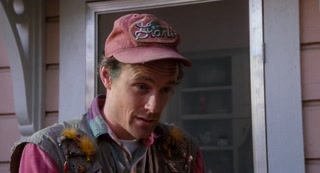

893 1101 thumbnail_0894.jpg


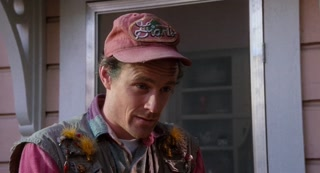

894 4871 thumbnail_0895.jpg


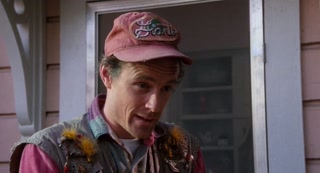

897 1667 thumbnail_0898.jpg


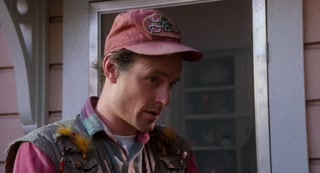

898 2246 thumbnail_0899.jpg


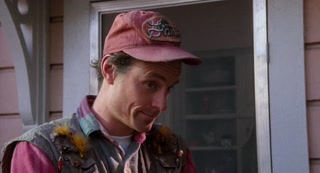

899 2207 thumbnail_0900.jpg


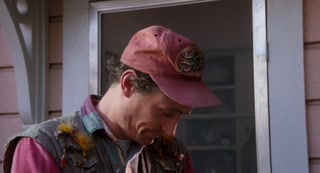

900 286 thumbnail_0901.jpg


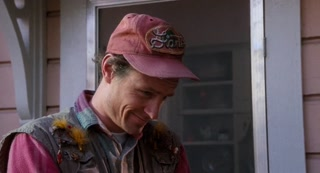

928 4368 thumbnail_0929.jpg


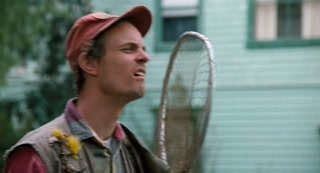

929 1115 thumbnail_0930.jpg


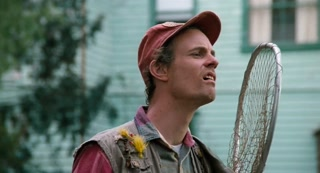

933 2215 thumbnail_0934.jpg


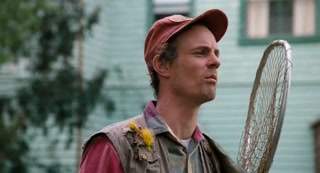

934 4128 thumbnail_0935.jpg


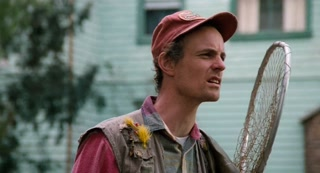

937 1892 thumbnail_0938.jpg


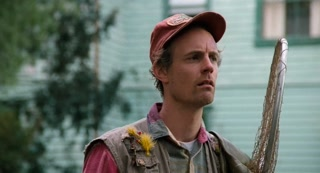

938 3083 thumbnail_0939.jpg


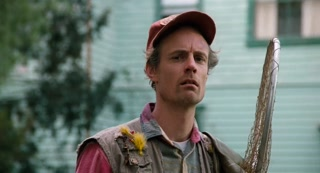

939 2736 thumbnail_0940.jpg


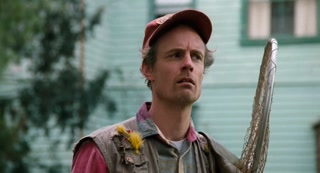

940 3614 thumbnail_0941.jpg


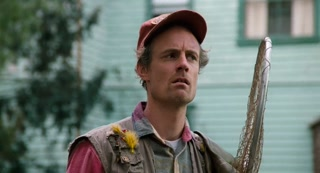

941 5349 thumbnail_0942.jpg


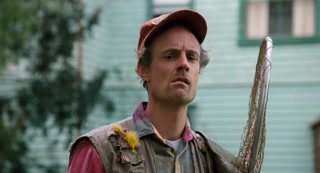

942 3813 thumbnail_0943.jpg


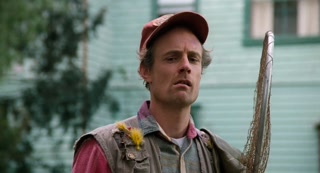

943 422 thumbnail_0944.jpg


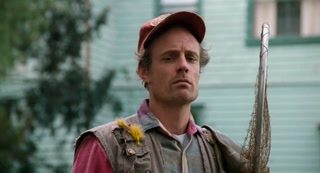

970 3831 thumbnail_0971.jpg


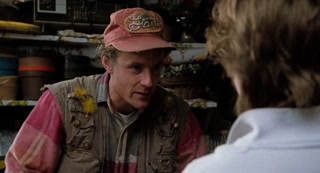

971 2458 thumbnail_0972.jpg


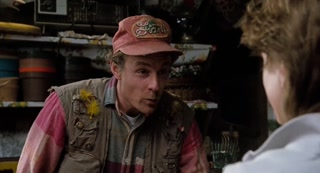

972 956 thumbnail_0973.jpg


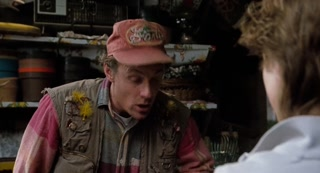

973 3498 thumbnail_0974.jpg


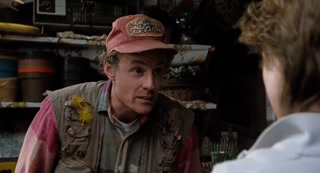

977 3944 thumbnail_0978.jpg


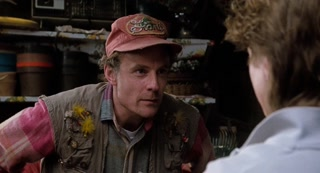

978 1688 thumbnail_0979.jpg


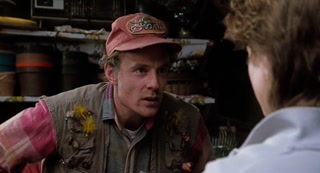

979 4901 thumbnail_0980.jpg


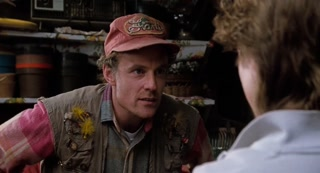

980 2969 thumbnail_0981.jpg


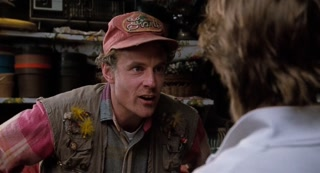

981 406 thumbnail_0982.jpg


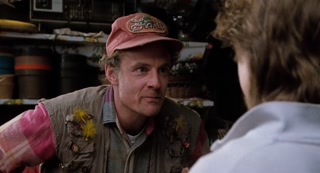

982 251 thumbnail_0983.jpg


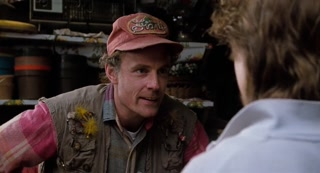

983 2349 thumbnail_0984.jpg


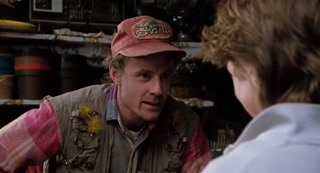

988 3678 thumbnail_0989.jpg


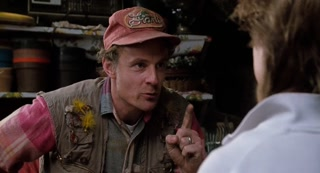

989 1910 thumbnail_0990.jpg


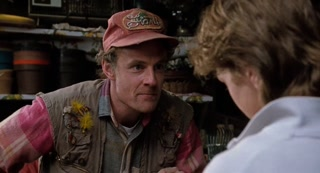

990 4101 thumbnail_0991.jpg


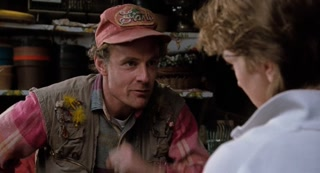

991 1914 thumbnail_0992.jpg


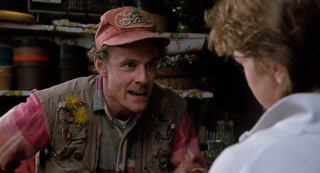

992 4108 thumbnail_0993.jpg


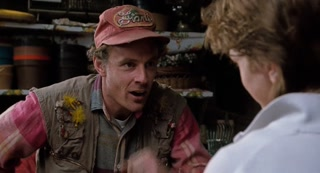

993 683 thumbnail_0994.jpg


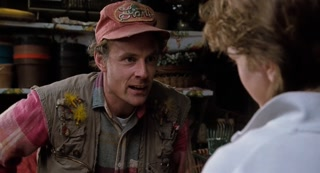

999 581 thumbnail_1000.jpg


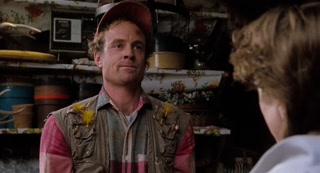

1000 1966 thumbnail_1001.jpg


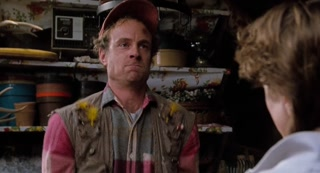

1001 1912 thumbnail_1002.jpg


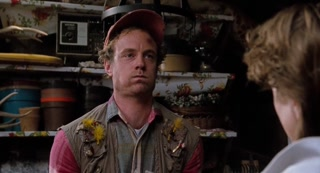

1002 3819 thumbnail_1003.jpg


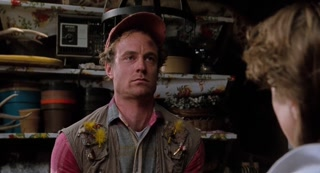

1003 1102 thumbnail_1004.jpg


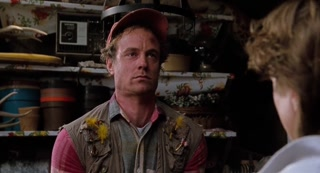

1007 1584 thumbnail_1008.jpg


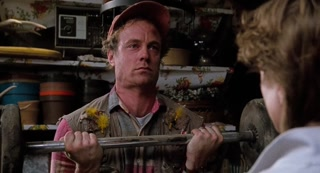

1008 183 thumbnail_1009.jpg


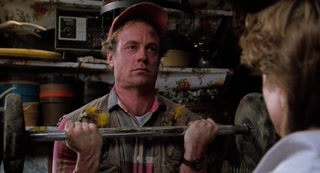

1009 2785 thumbnail_1010.jpg


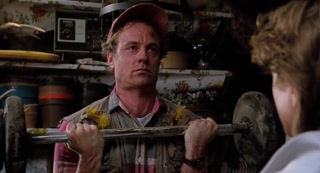

1014 3921 thumbnail_1015.jpg


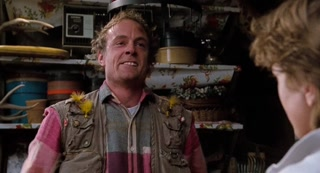

1015 842 thumbnail_1016.jpg


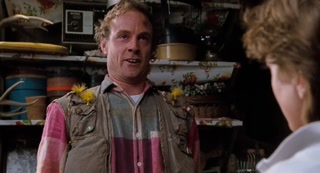

1016 1528 thumbnail_1017.jpg


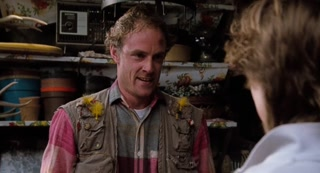

1017 4068 thumbnail_1018.jpg


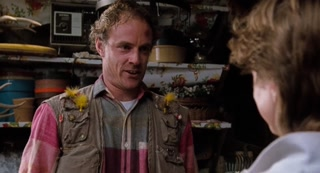

1018 928 thumbnail_1019.jpg


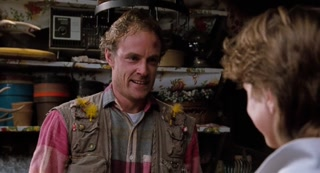

1026 390 thumbnail_1027.jpg


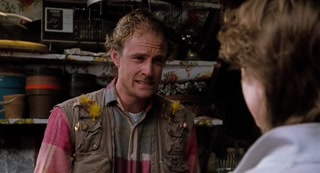

1027 2292 thumbnail_1028.jpg


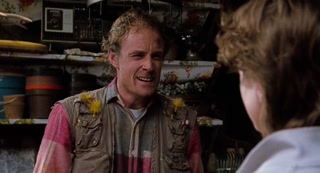

1028 3632 thumbnail_1029.jpg


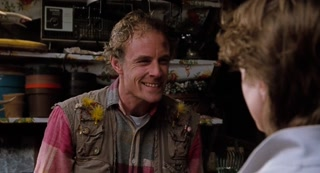

1029 1195 thumbnail_1030.jpg


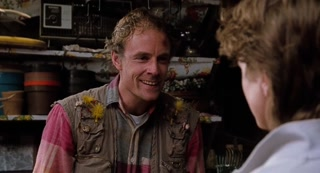

1030 4709 thumbnail_1031.jpg


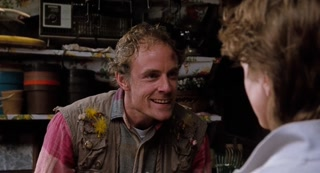

1031 1663 thumbnail_1032.jpg


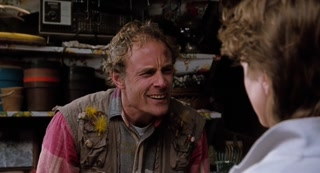

1032 2931 thumbnail_1033.jpg


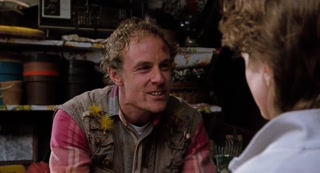

1070 4575 thumbnail_1071.jpg


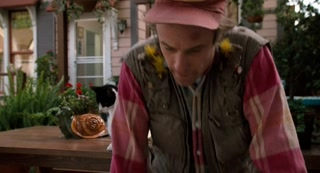

1071 2937 thumbnail_1072.jpg


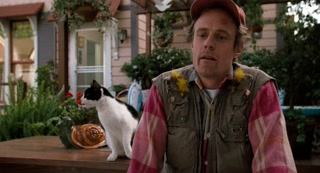

1072 5037 thumbnail_1073.jpg


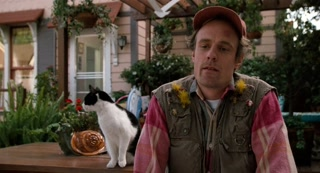

1073 3504 thumbnail_1074.jpg


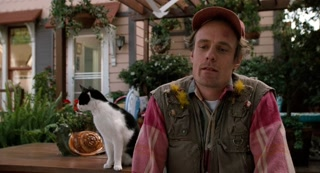

1074 1984 thumbnail_1075.jpg


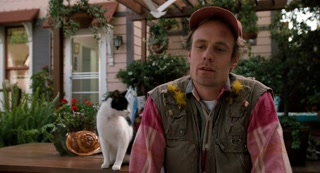

In [52]:
show_list = [1234,5049,786]
for i in cluster_indexes[0][50:200]:
    print(i,sorted_indexes[i],moive_embeddings[i]["input"])
    image_path = image_root+moive_embeddings[i]["input"]
    # Display the image
    display(Image(filename=image_path))